In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from google.colab.patches import cv2_imshow

1) Original Image:


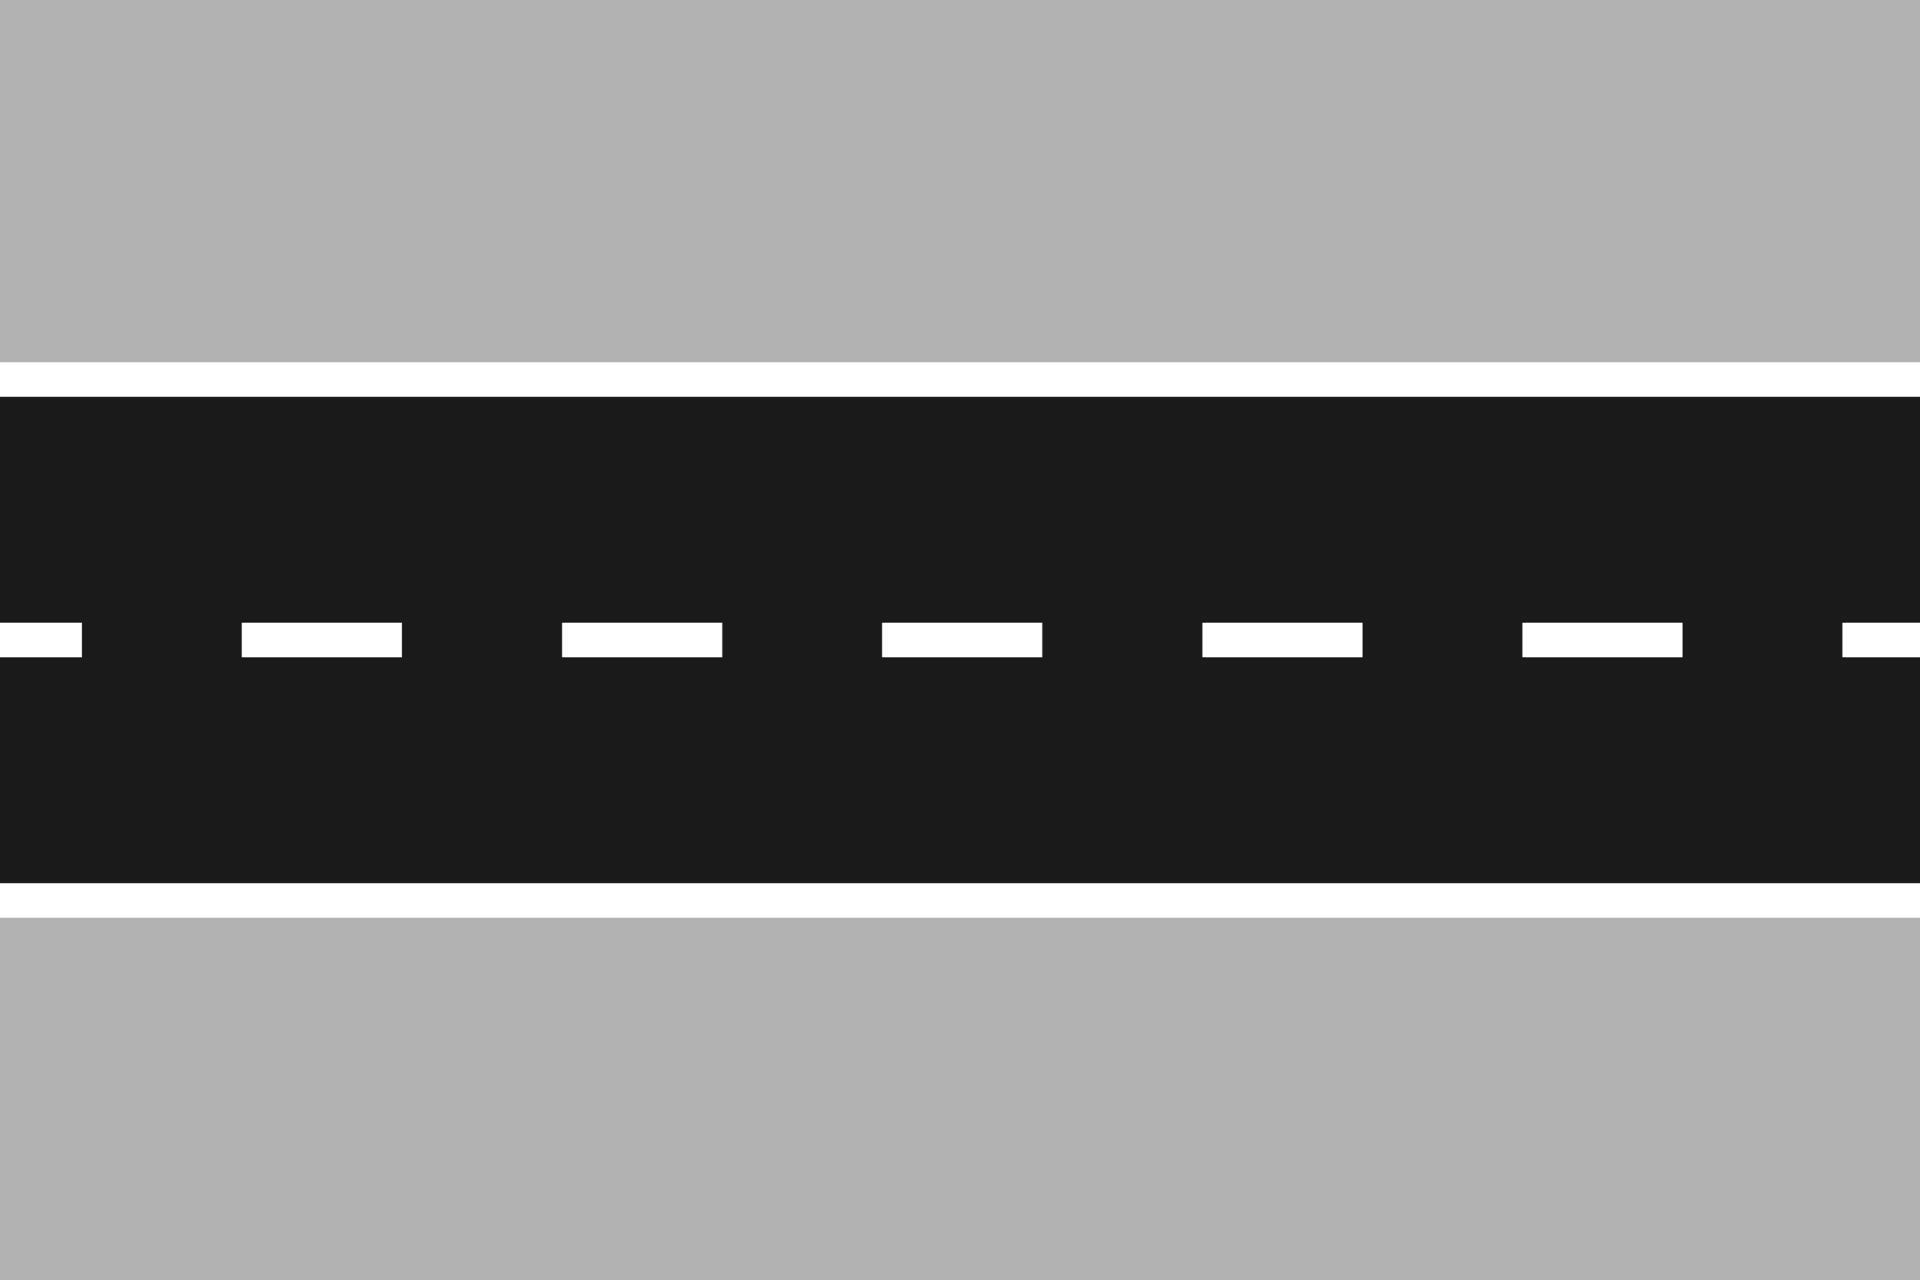

In [ ]:
img = cv2.imread("/content/Road Lane Img.jpg")
if img is None:
    raise ValueError("Image not found. Check your path or filename.")

img_copy = img.copy()

print("1) Original Image:")
cv2_imshow(img)

2) Grayscale Image:


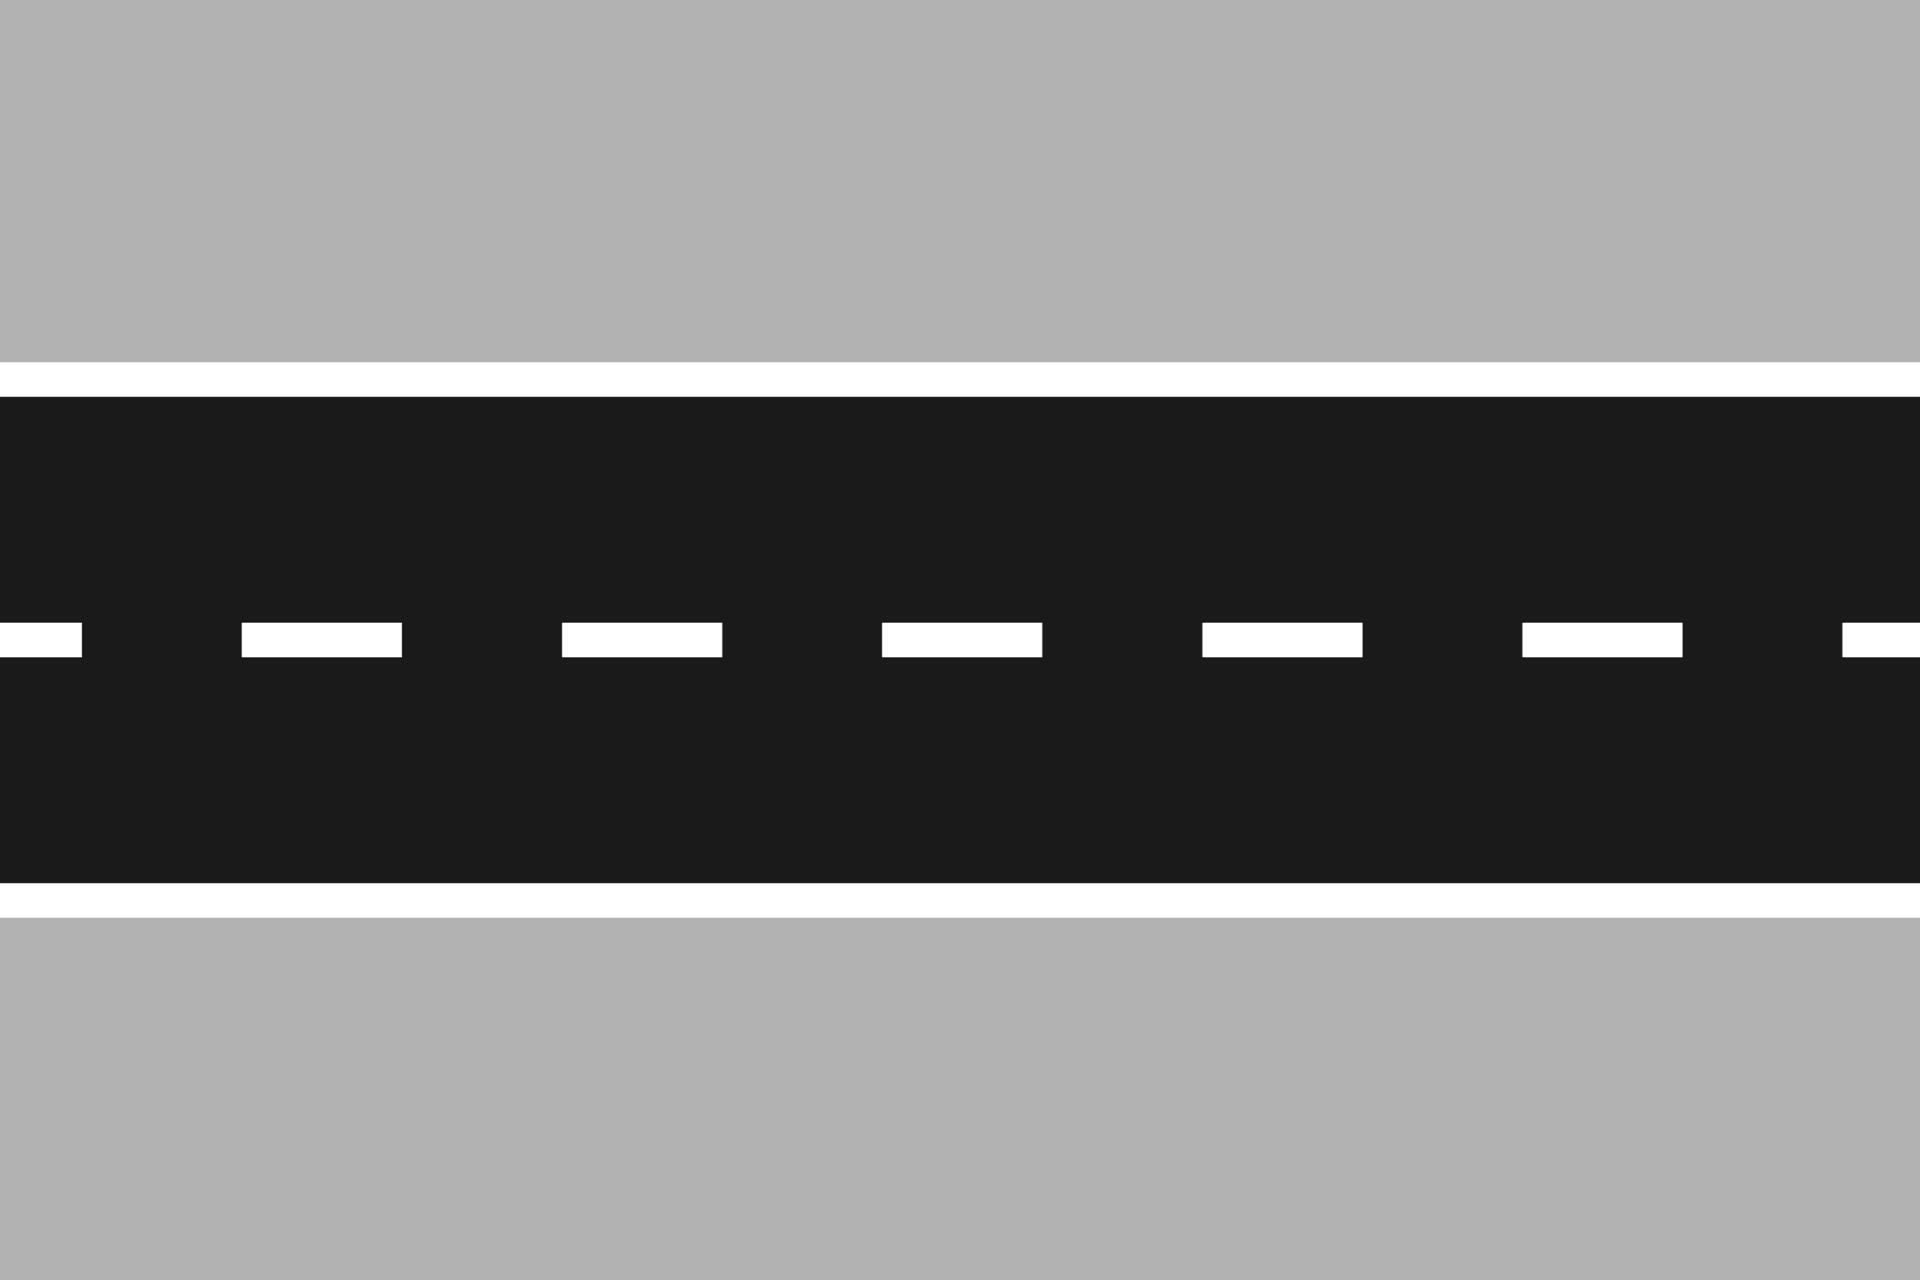

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("2) Grayscale Image:")
cv2_imshow(gray)

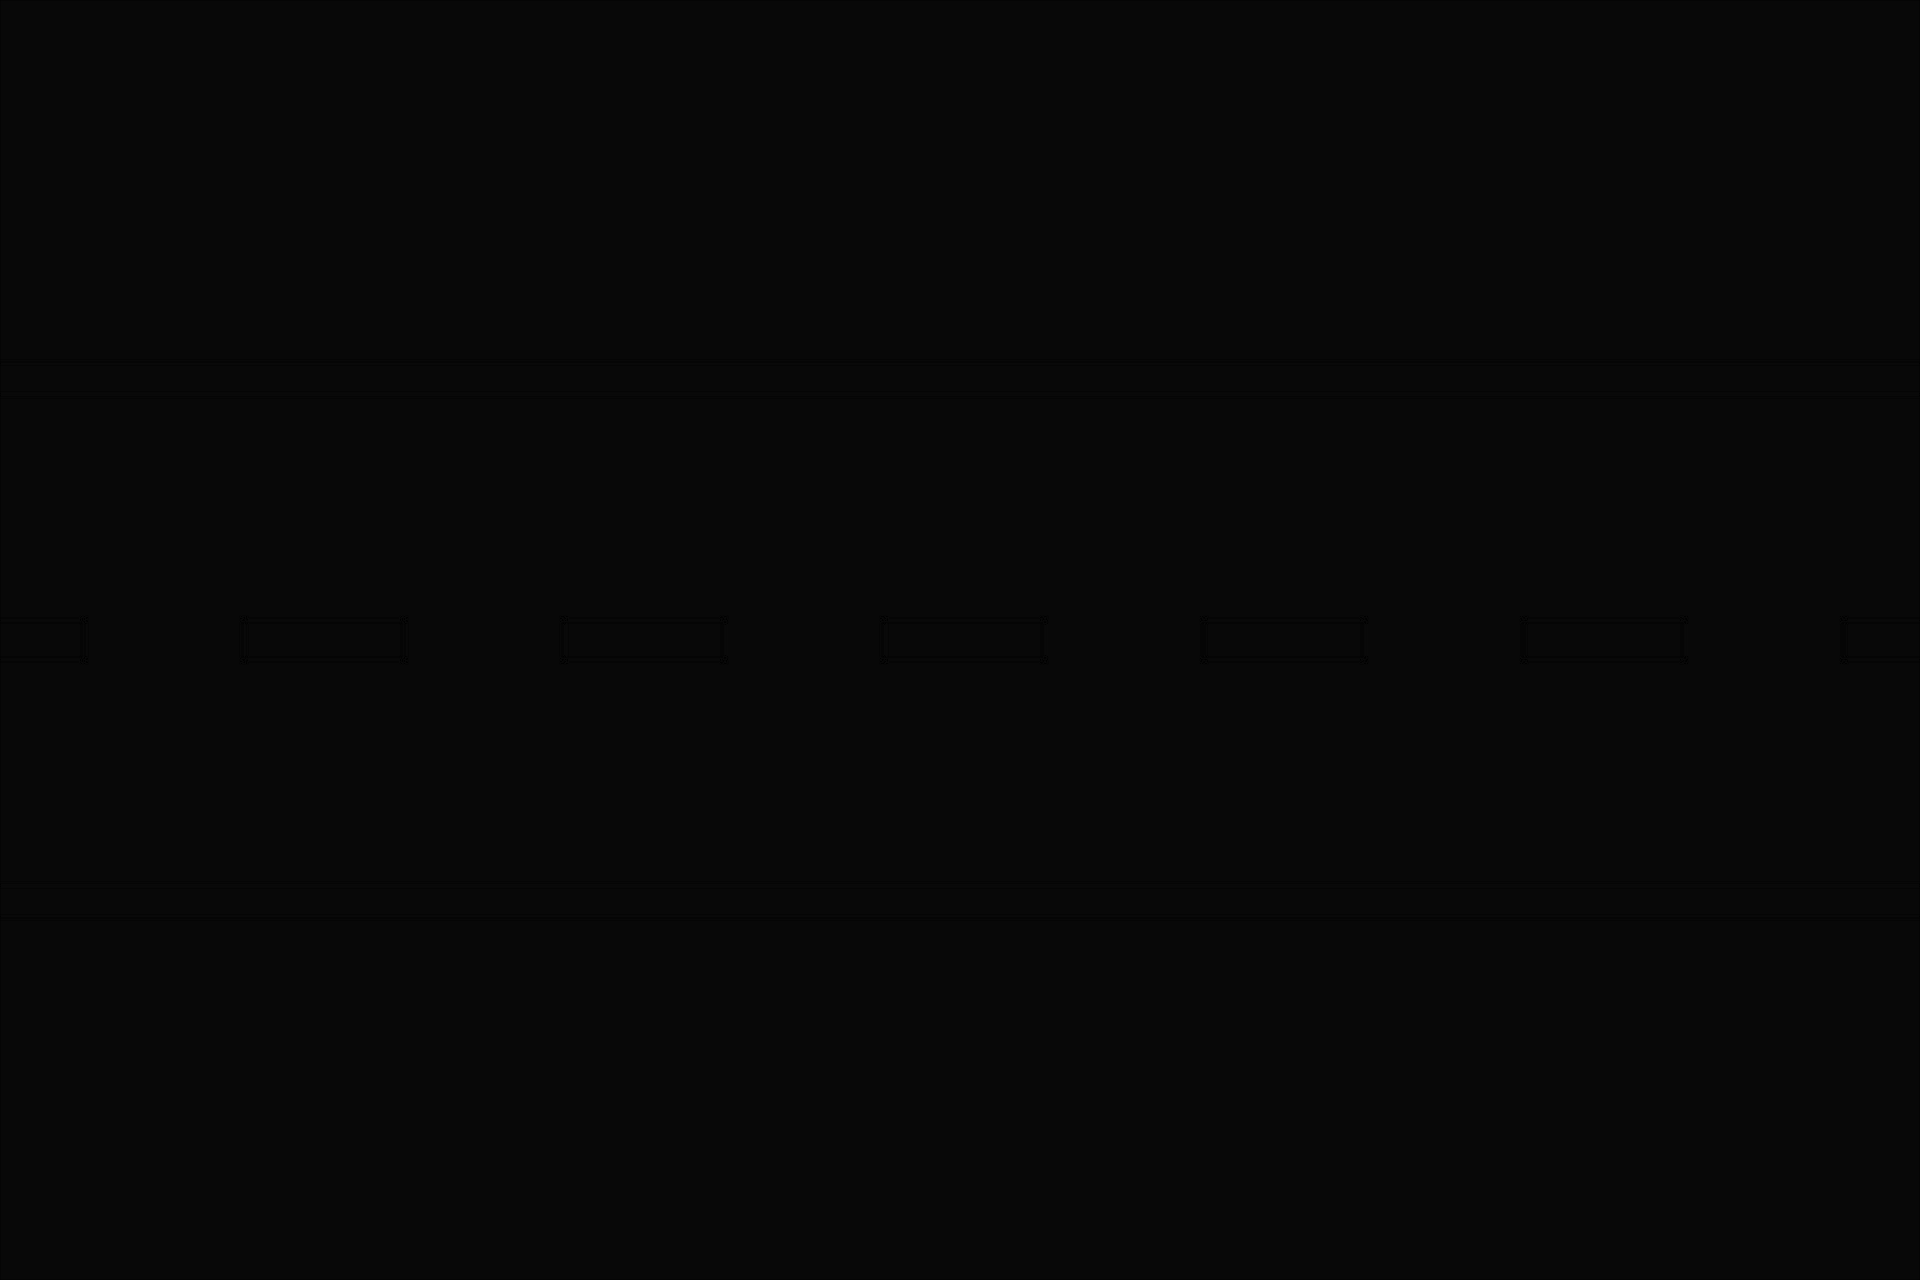

In [ ]:
lbp = local_binary_pattern(gray, P=8, R=1, method="uniform").astype(np.uint8)
cv2_imshow(lbp)

3) Binary Thresholded Image:


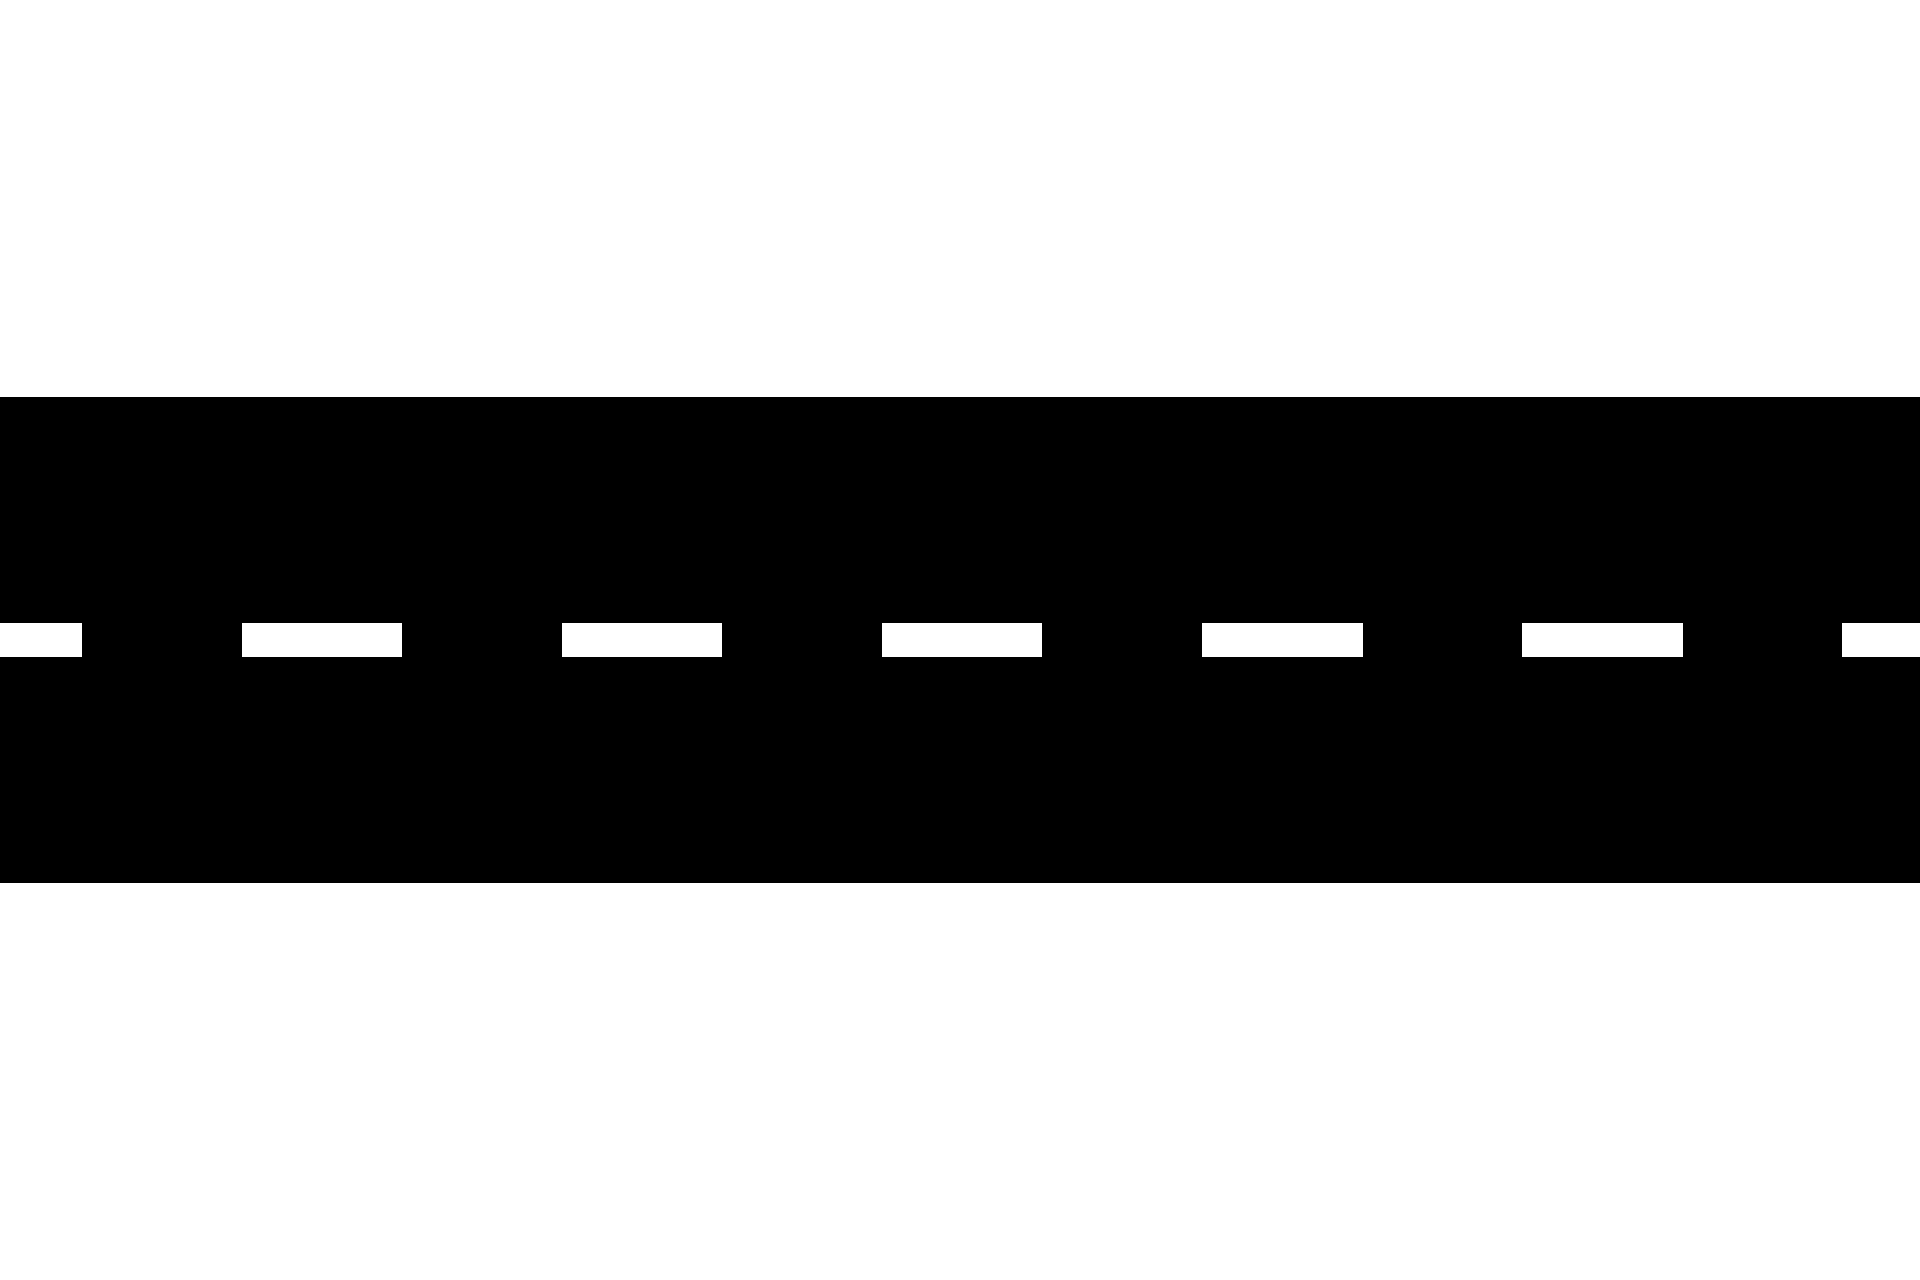

In [ ]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
print("3) Binary Thresholded Image:")
cv2_imshow(thresh)

4) Closed Image:


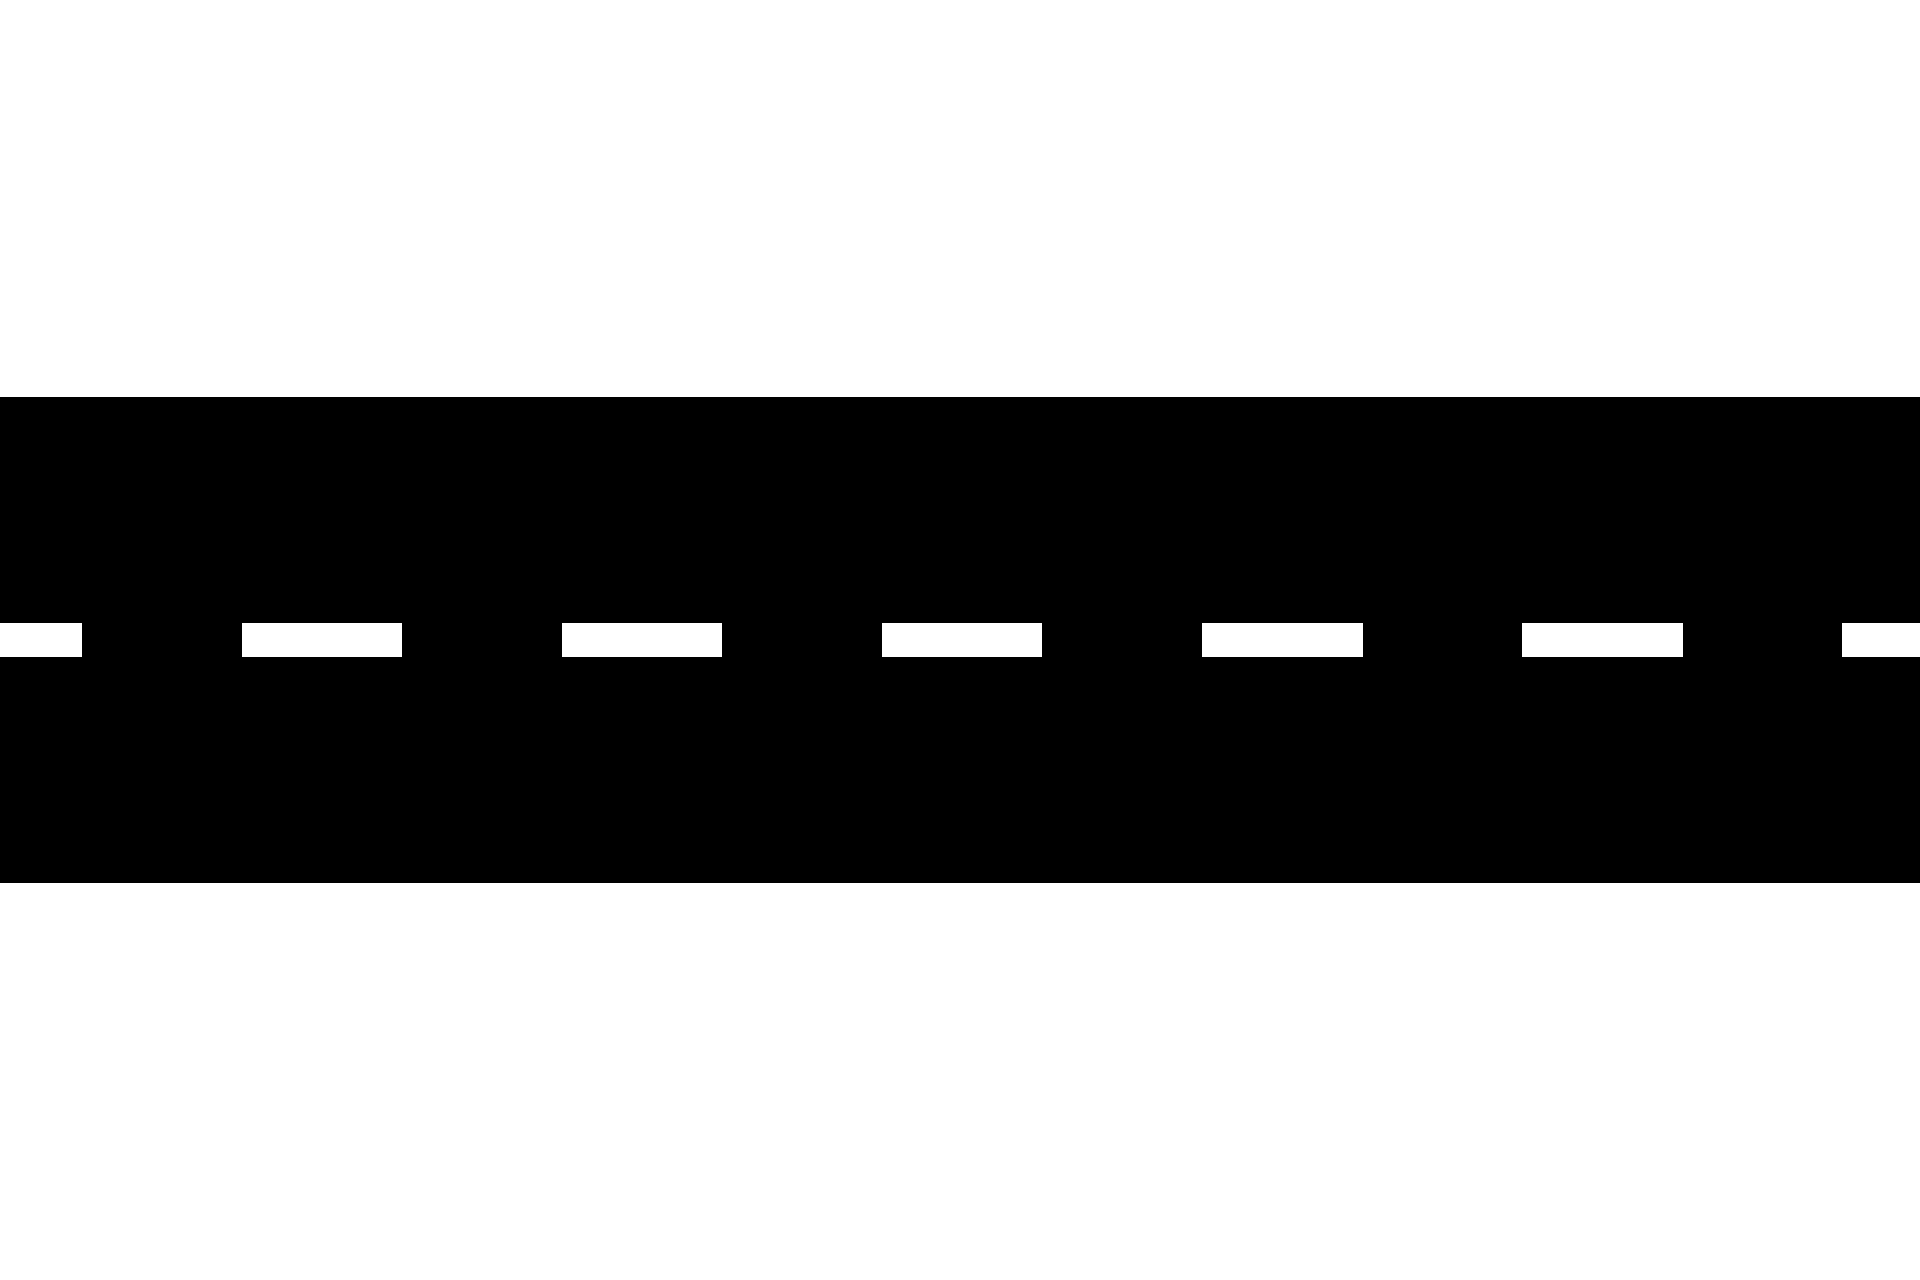

In [ ]:
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
print("4) Closed Image:")
cv2_imshow(closed)

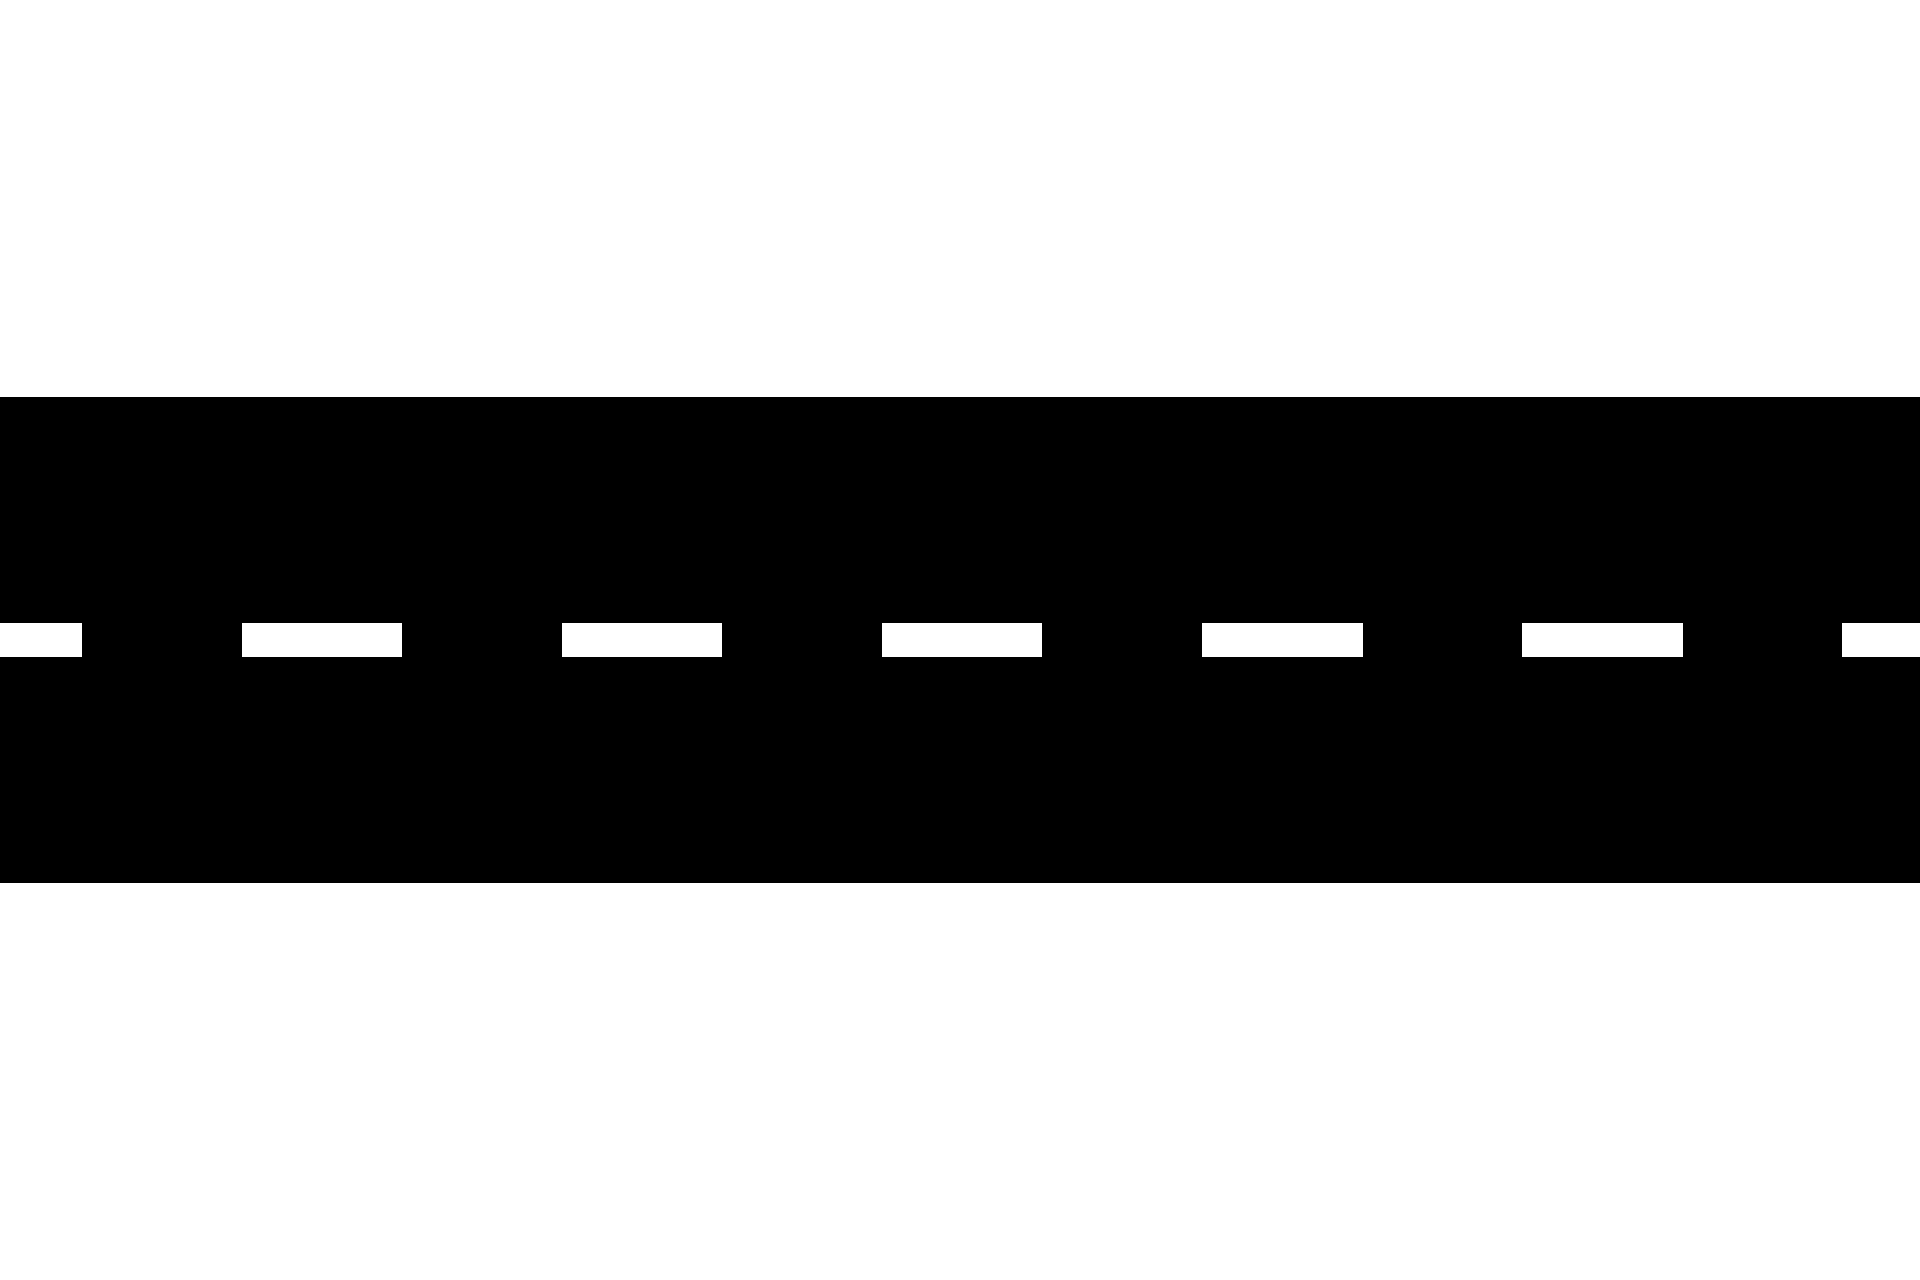

In [ ]:
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

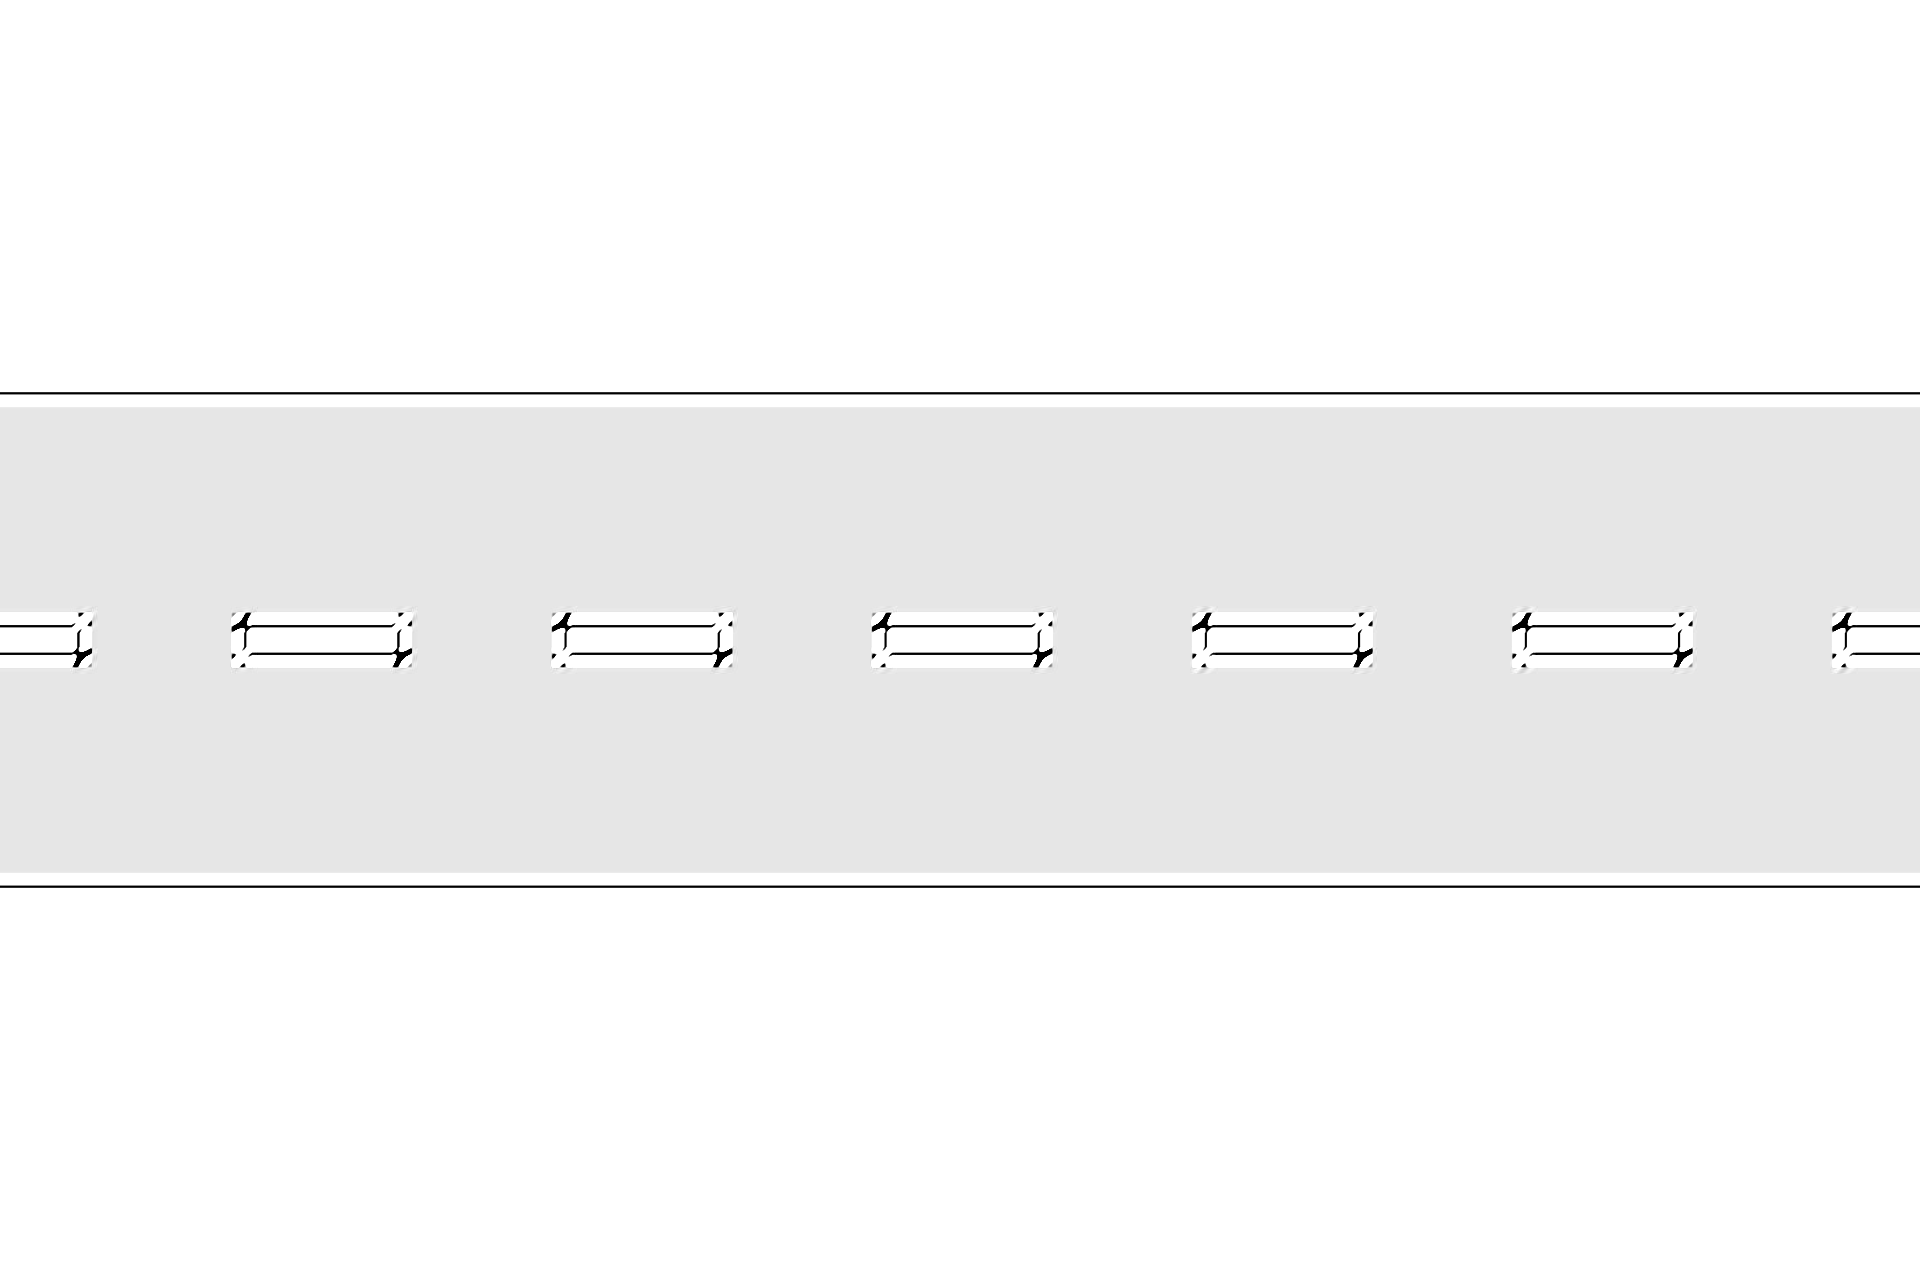

In [ ]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi / 4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
cv2_imshow(filtered)

5) Canny Edges:


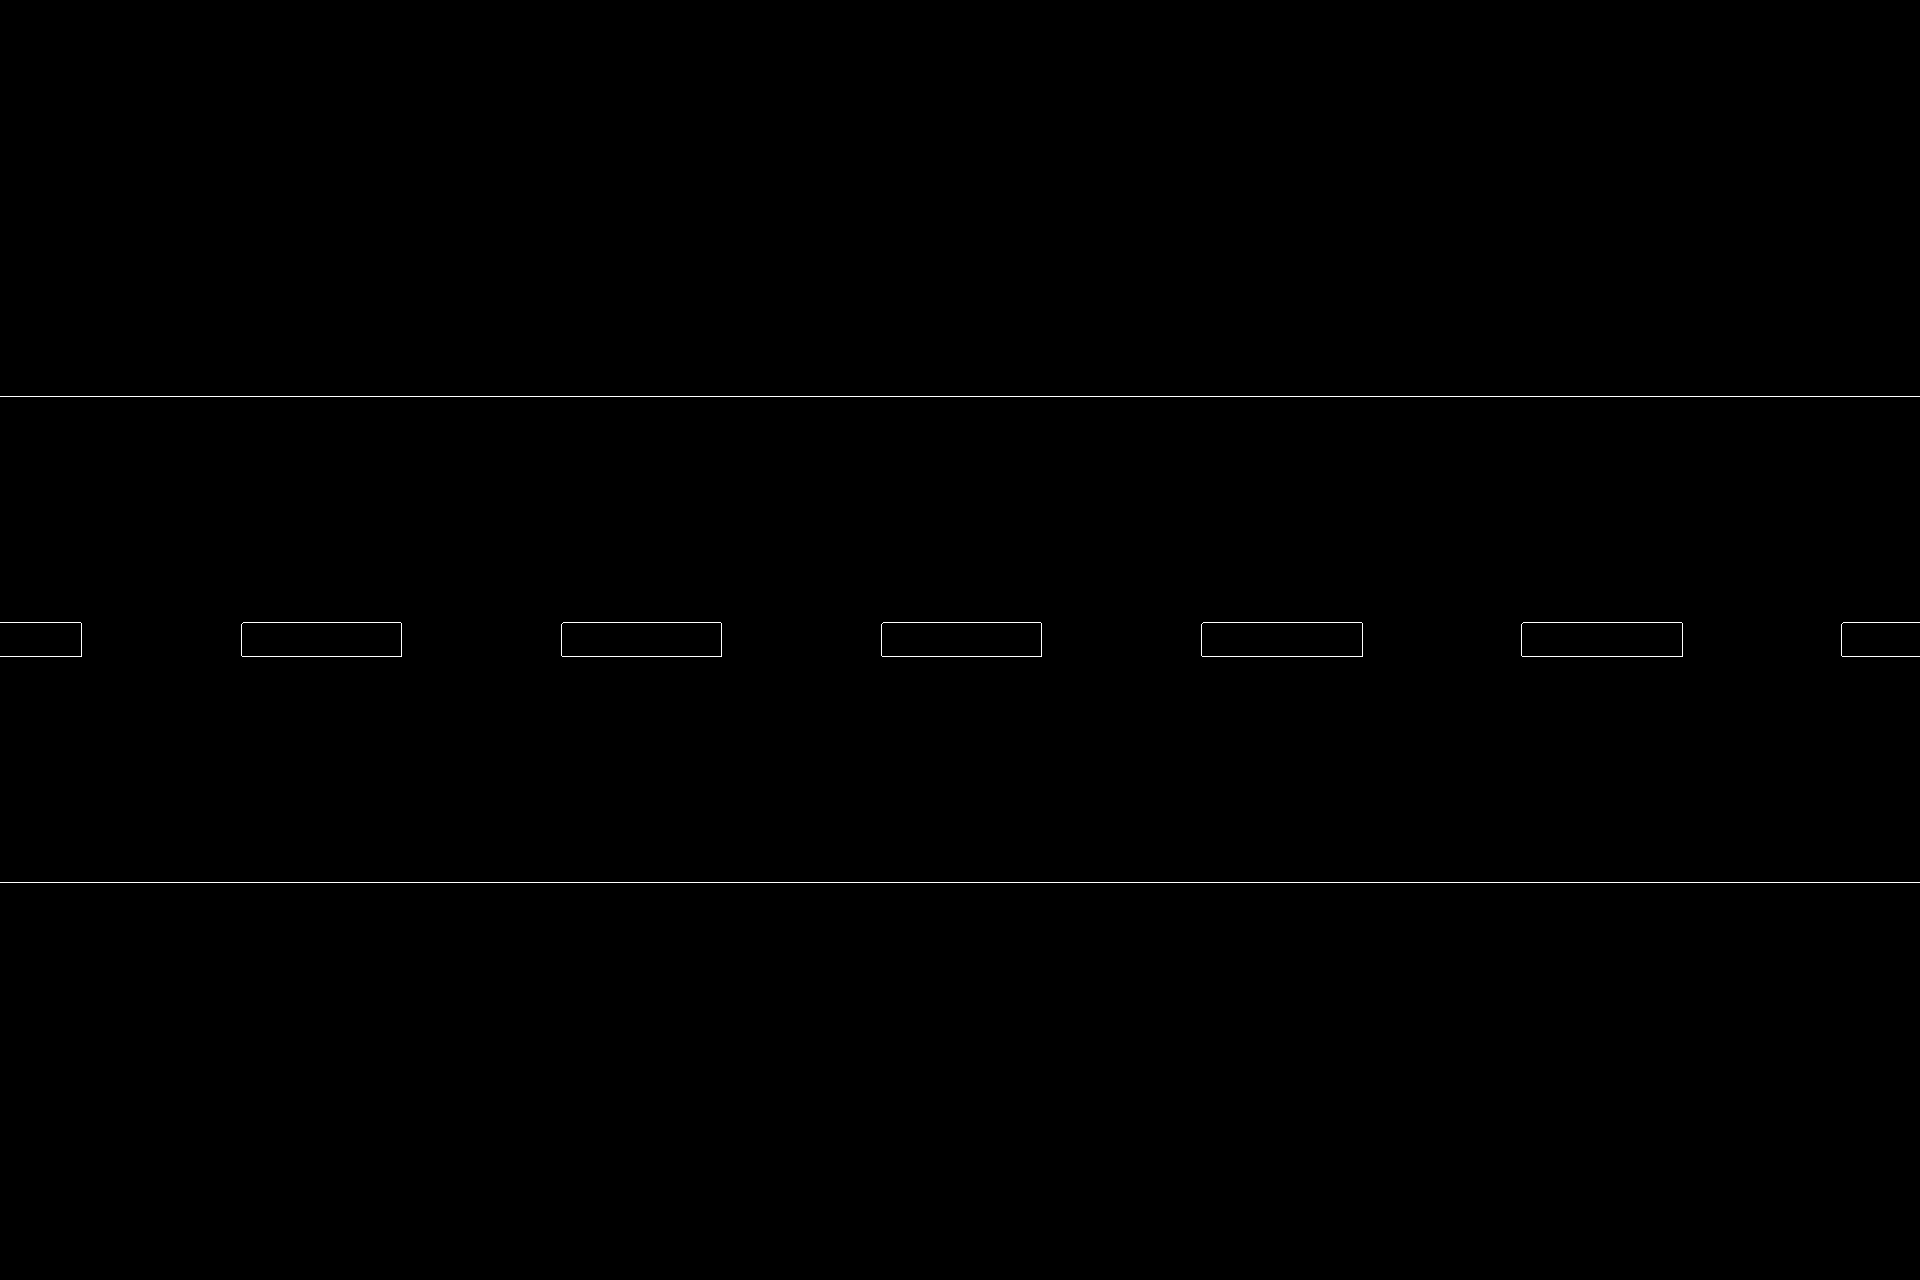

In [ ]:
edges = cv2.Canny(closed, 50, 150)
print("5) Canny Edges:")
cv2_imshow(edges)

In [ ]:
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=50,
    minLineLength=50,
    maxLineGap=100
)

In [ ]:
img_with_lines = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 3)


Detected Lines on Original:


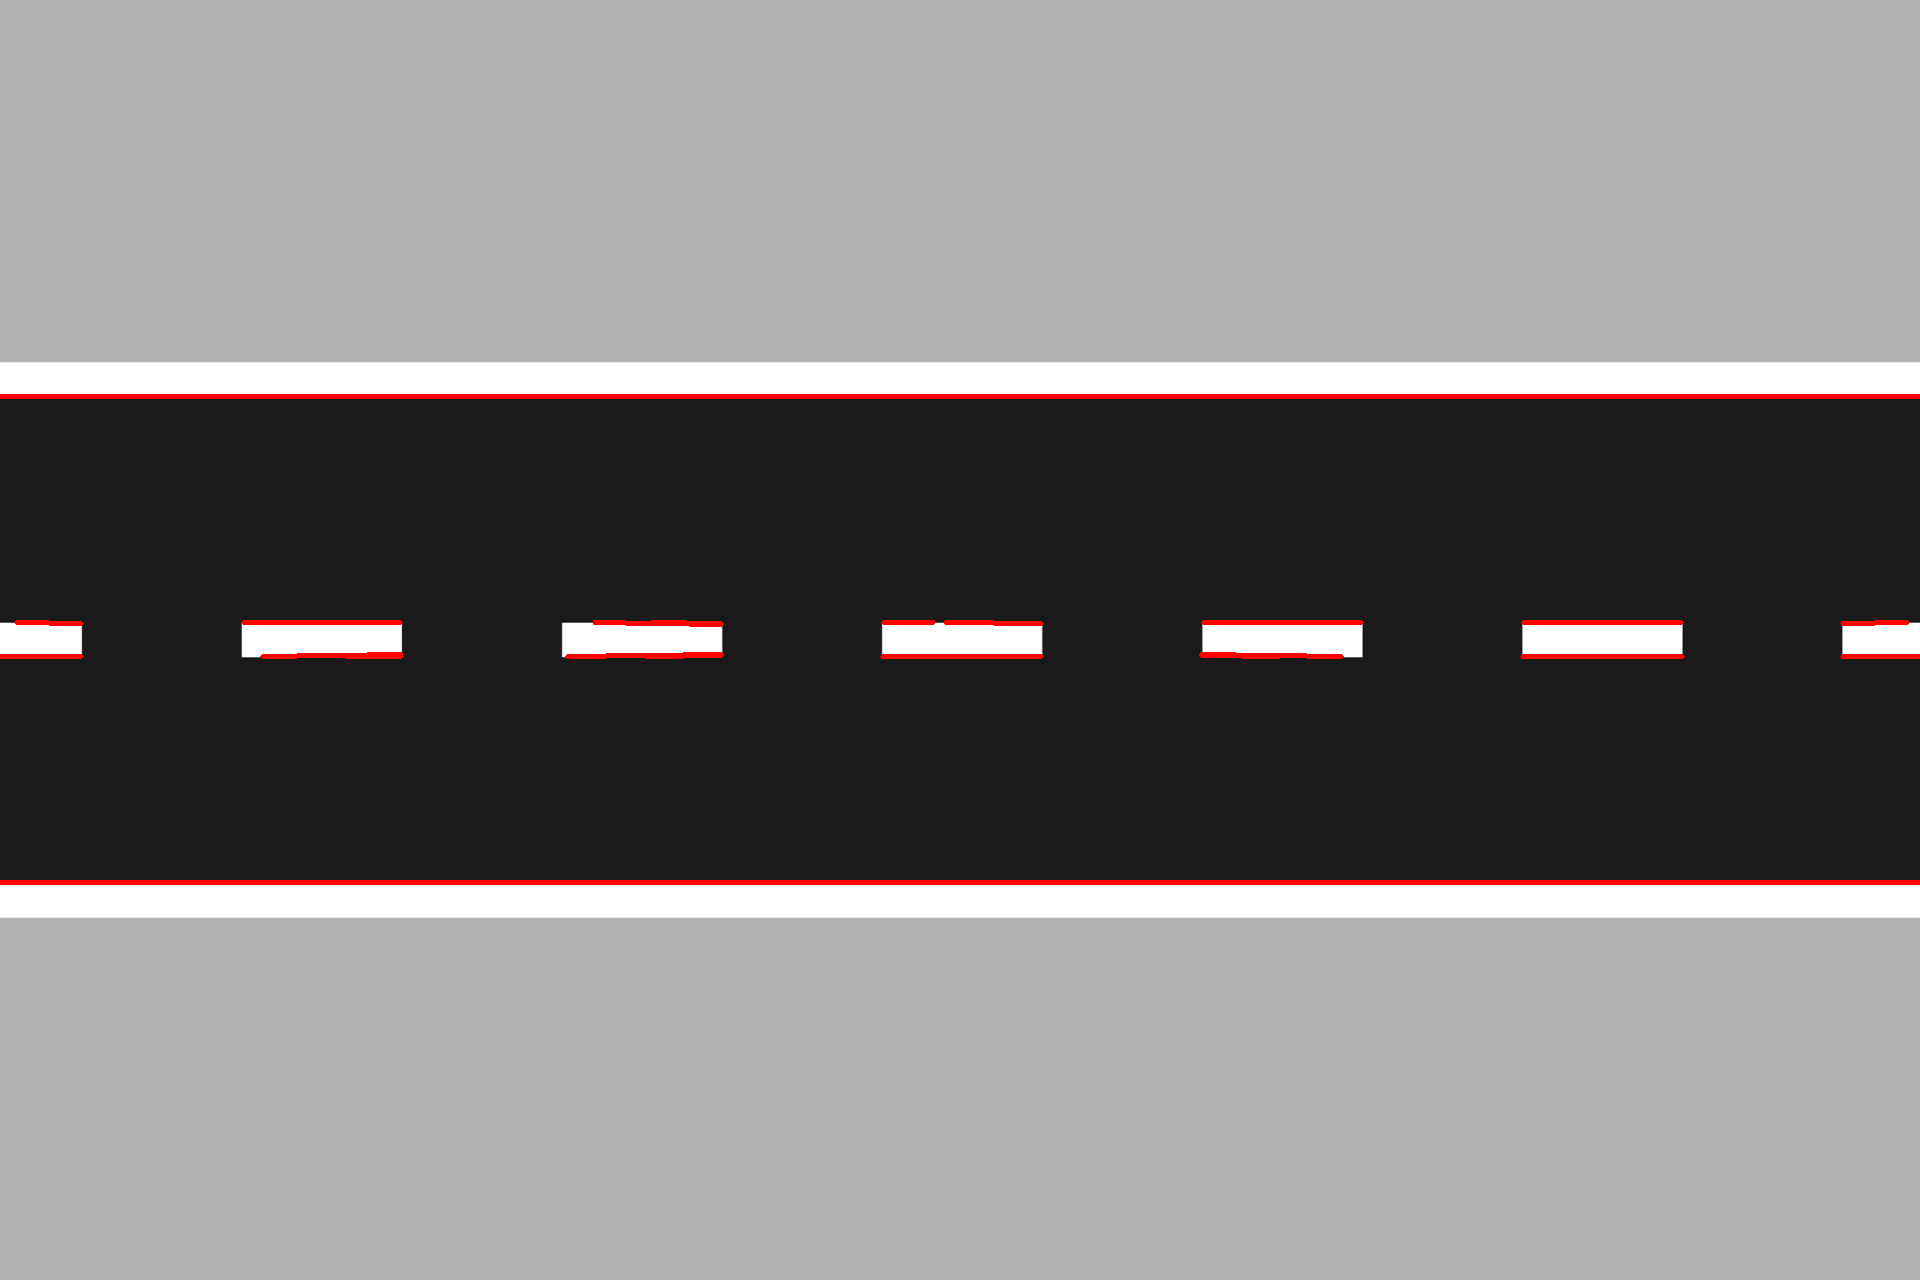

In [ ]:
print("Detected Lines on Original:")
cv2_imshow(img_with_lines)

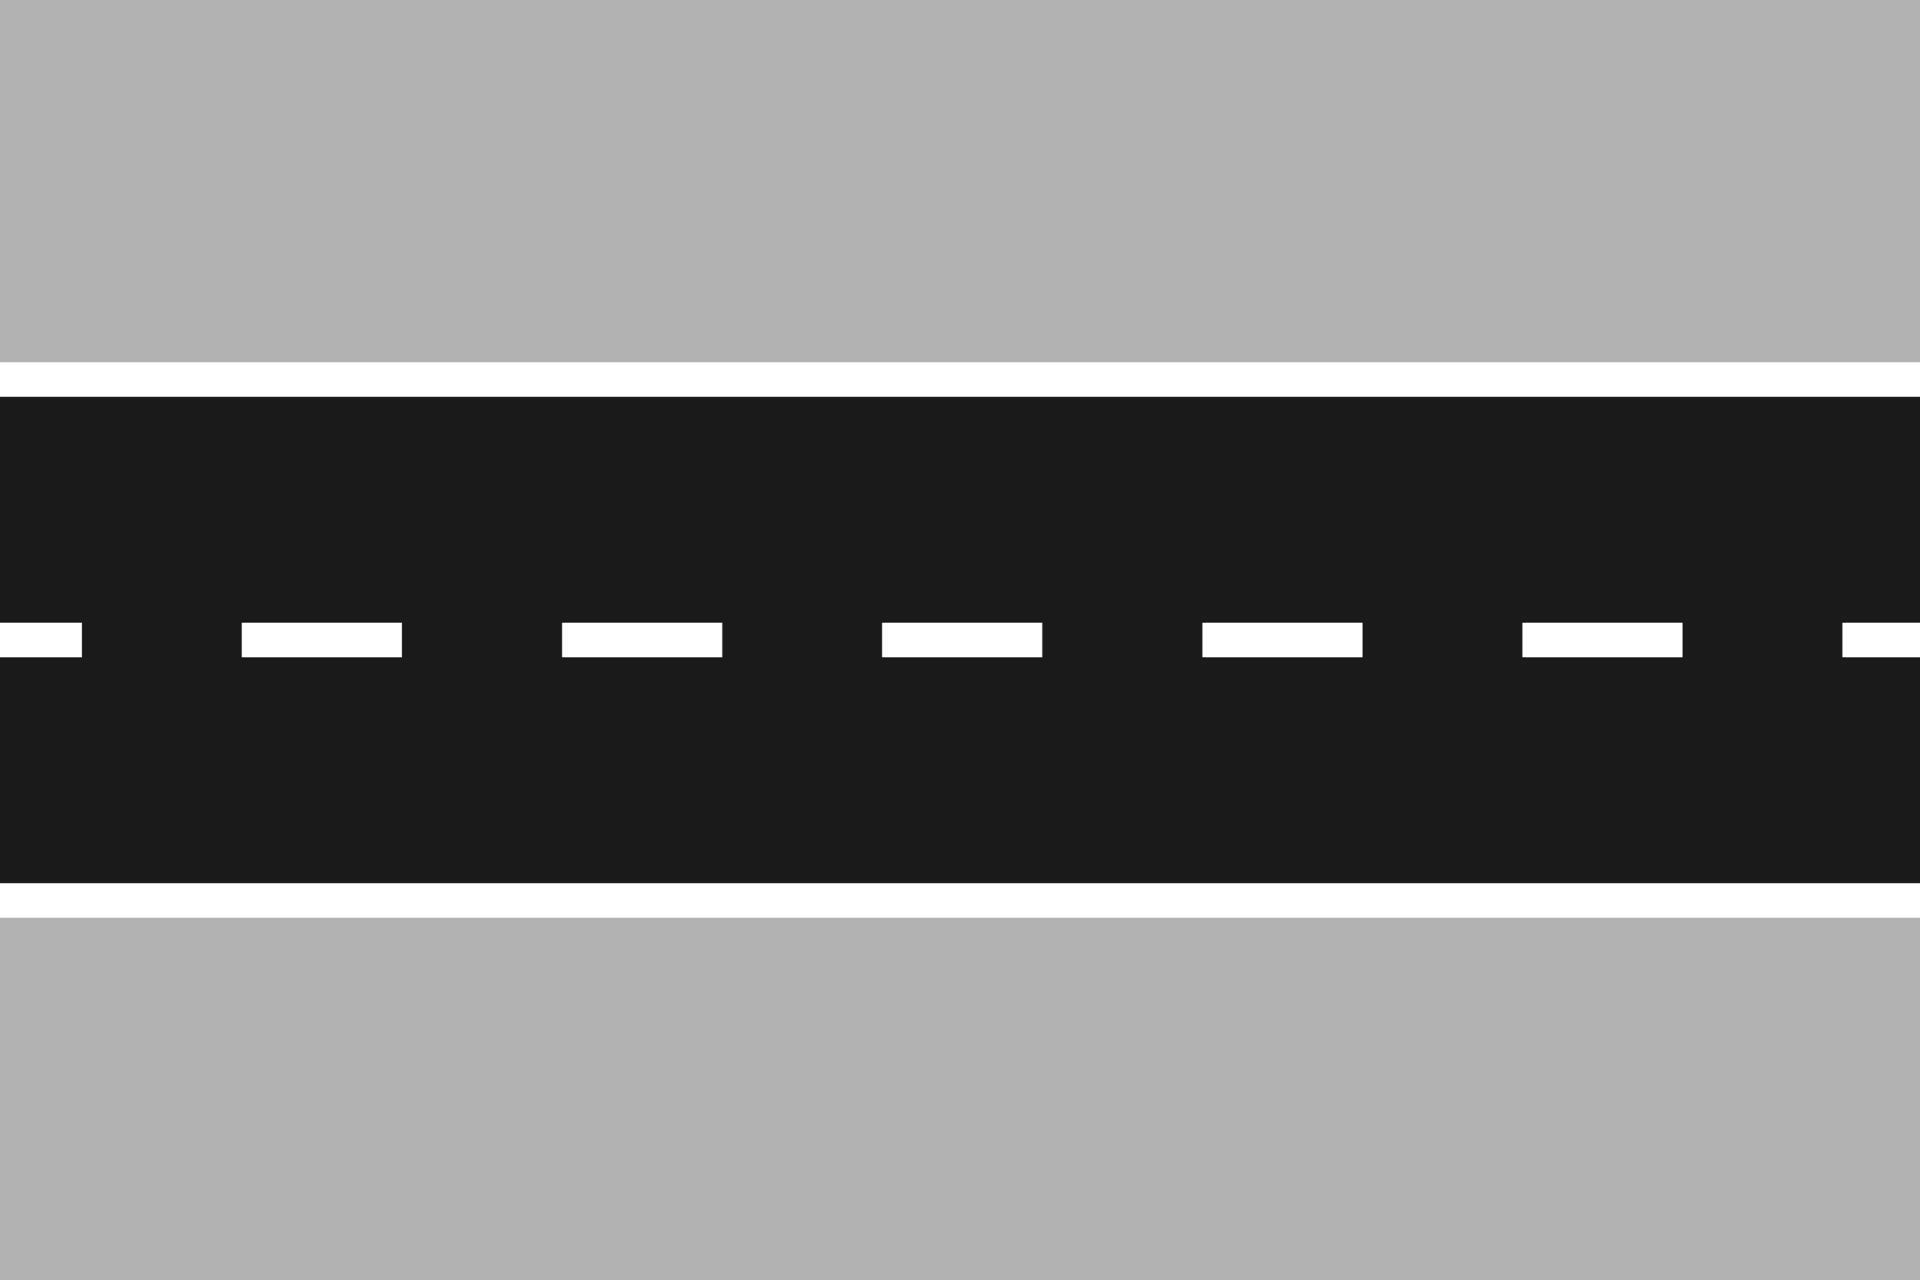

In [ ]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 50, param1=50, param2=30, minRadius=10, maxRadius=100)

img_with_circles = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img_with_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
cv2_imshow(img_with_circles)

1) Original Image:


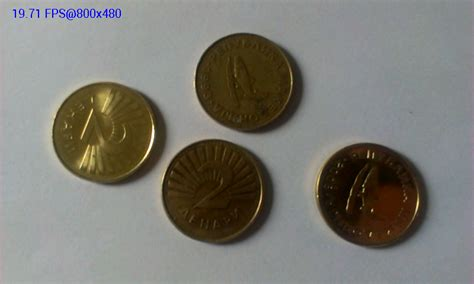

In [ ]:
img = cv2.imread("/content/Coins.png")
if img is None:
    raise ValueError("Image not found. Check your path or filename.")

img_copy = img.copy()

print("1) Original Image:")
cv2_imshow(img)

2) Grayscale Image:


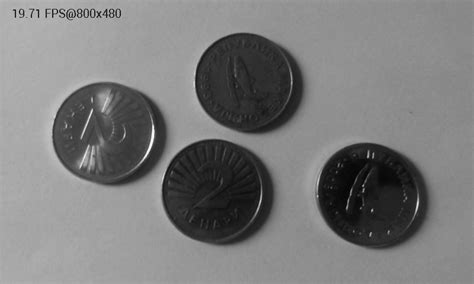

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("2) Grayscale Image:")
cv2_imshow(gray)

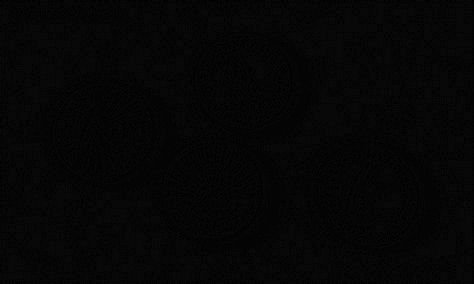

In [ ]:
lbp = local_binary_pattern(gray, P=8, R=1, method="uniform").astype(np.uint8)
cv2_imshow(lbp)

3) Binary Thresholded Image:


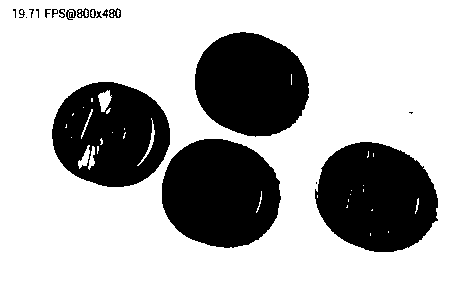

In [ ]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
print("3) Binary Thresholded Image:")
cv2_imshow(thresh)

4) Closed Image:


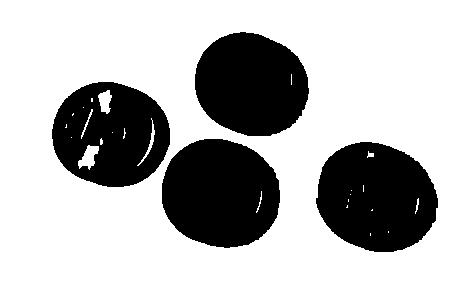

In [ ]:
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
print("4) Closed Image:")
cv2_imshow(closed)

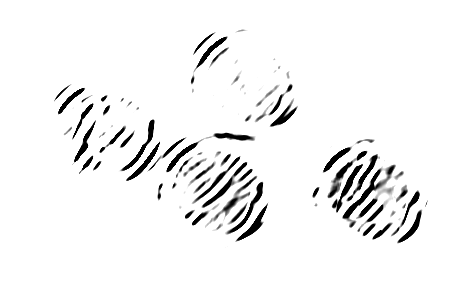

In [ ]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi / 4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel)
cv2_imshow(filtered)

5) Canny Edges:


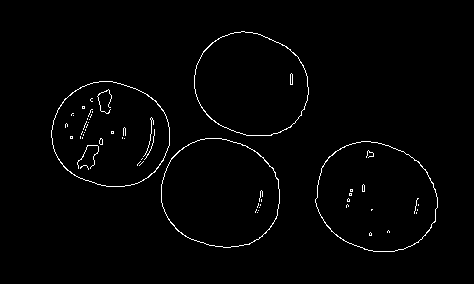

In [ ]:
edges = cv2.Canny(closed, 50, 150)
print("5) Canny Edges:")
cv2_imshow(edges)

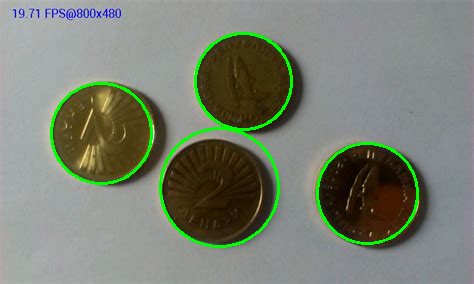

'/mnt/data/corrected_image.png'

In [ ]:
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=50,
    param1=50,
    param2=40,
    minRadius=20,
    maxRadius=60
)

img_with_circles = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img_with_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)

corrected_image_path = "/mnt/data/corrected_image.png"
cv2.imwrite(corrected_image_path, img_with_circles)
cv2_imshow(img_with_circles)
corrected_image_path

In [ ]:
image_path = "/content/Coins.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img_shape = img.shape
unique_values = np.unique(img)
img_shape, unique_values[:20]

((284, 474),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=uint8))

In [ ]:
import os
import shutil
import random
import subprocess
from torchvision import datasets, transforms
from PIL import Image
import yaml

In [ ]:
BASE_DIR = './fashion_yolo'
IMG_DIR = os.path.join(BASE_DIR, 'images')
LBL_DIR = os.path.join(BASE_DIR, 'labels')
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')
TRAIN_LBL_DIR = os.path.join(TRAIN_DIR, 'labels')
TRAIN_IMG_DIR = os.path.join(TRAIN_DIR, 'images')
VAL_LBL_DIR = os.path.join(VAL_DIR, 'labels')
VAL_IMG_DIR = os.path.join(VAL_DIR, 'images')

In [ ]:
for d in [IMG_DIR, LBL_DIR, TRAIN_IMG_DIR, TRAIN_LBL_DIR, VAL_IMG_DIR, VAL_LBL_DIR]:
    os.makedirs(d, exist_ok=True)

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224))
])

In [ ]:
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.86MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.9MB/s]


In [ ]:
num_images = len(dataset)
for idx, (img, label) in enumerate(dataset):
    img_filename = f'image_{idx}.jpg'
    label_filename = f'image_{idx}.txt'
    img.save(os.path.join(IMG_DIR, img_filename))
    annotation = f"{label} 0.5 0.5 0.9 0.9\n"
    with open(os.path.join(LBL_DIR, label_filename), 'w') as f:
        f.write(annotation)

In [ ]:
all_files = sorted(os.listdir(IMG_DIR))
random.seed(42)
random.shuffle(all_files)
split_idx = int(0.8 * len(all_files))
train_files = all_files[:split_idx]
val_files = all_files[split_idx:]

In [ ]:
def copy_files(file_list, dest_img_dir, dest_lbl_dir):
    for file in file_list:
        shutil.copy(os.path.join(IMG_DIR, file), os.path.join(dest_img_dir, file))
        base = os.path.splitext(file)[0]
        lbl_file = base + '.txt'
        shutil.copy(os.path.join(LBL_DIR, lbl_file), os.path.join(dest_lbl_dir, lbl_file))

copy_files(train_files, TRAIN_IMG_DIR, TRAIN_LBL_DIR)
copy_files(val_files, VAL_IMG_DIR, VAL_LBL_DIR)

In [ ]:
data_yaml = {
    'train': os.path.abspath(TRAIN_IMG_DIR),
    'val': os.path.abspath(VAL_IMG_DIR),
    'nc': 10,
    'names': [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
}

In [ ]:
yaml_path = os.path.join(BASE_DIR, 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5

Cloning into '/content/yolov5'...
remote: Enumerating objects: 17274, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17274 (delta 1), reused 0 (delta 0), pack-reused 17271 (from 3)
Receiving objects: 100% (17274/17274), 16.13 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (11859/11859), done.


In [ ]:
!ls /content/yolov5

benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 224 --batch 16 --epochs 3 --data /content/fashion_yolo/data.yaml --cfg yolov5s.yaml --weights yolov5s.pt

Streaming output truncated to the last 5000 lines.
        2/2     0.648G    0.01528   0.008715    0.02735         49        224:  17% 512/3000 [01:02<06:35,  6.28it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        2/2     0.648G    0.01528   0.008713    0.02734         47        224:  17% 513/3000 [01:02<06:47,  6.11it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        2/2     0.648G    0.01528   0.008712    0.02735         42        224:  17% 514/3000 [01:02<06:54,  5.99it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        2/2     0.648G    0.

Images found: ['val_batch1_labels.jpg', 'confusion_matrix.png', 'val_batch2_pred.jpg', 'val_batch2_labels.jpg', 'results.png', 'train_batch0.jpg', 'val_batch1_pred.jpg', 'labels.jpg', 'labels_correlogram.jpg', 'train_batch1.jpg', 'val_batch0_pred.jpg', 'train_batch2.jpg', 'F1_curve.png', 'PR_curve.png', 'P_curve.png', 'val_batch0_labels.jpg', 'R_curve.png']


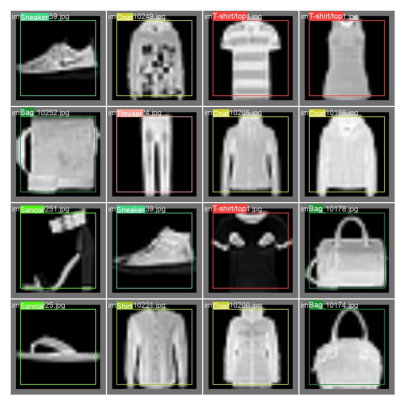

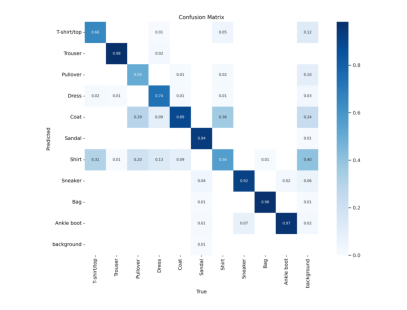

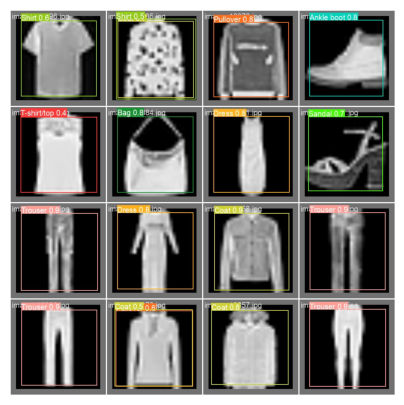

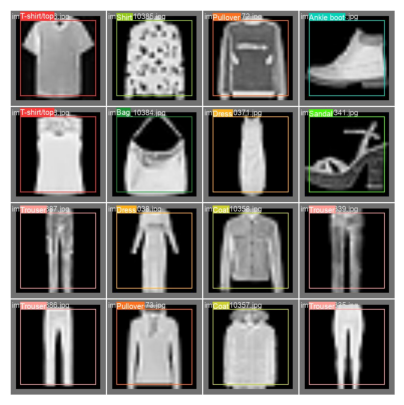

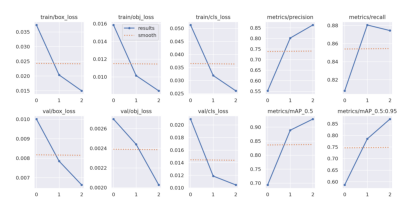

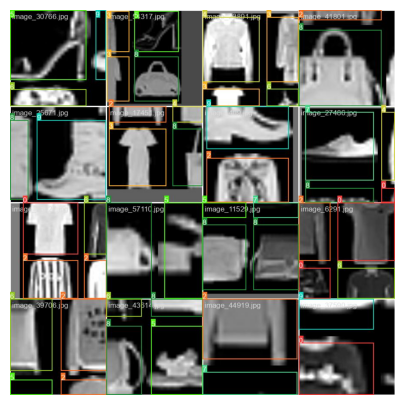

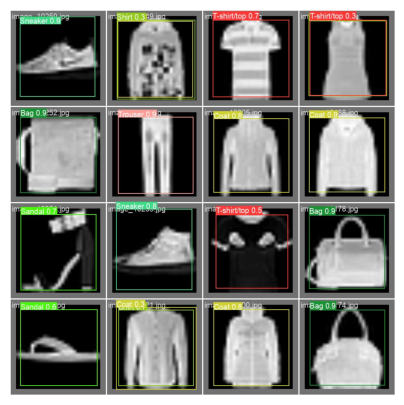

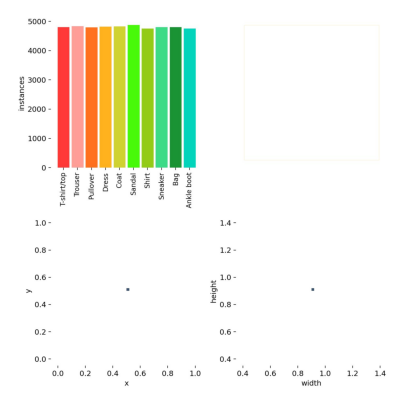

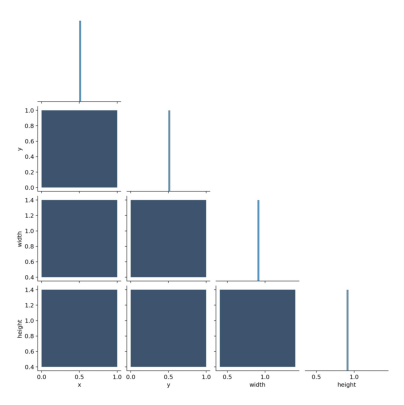

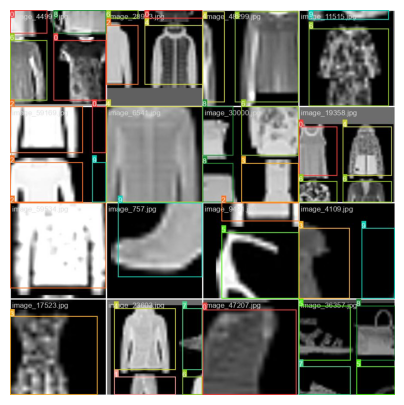

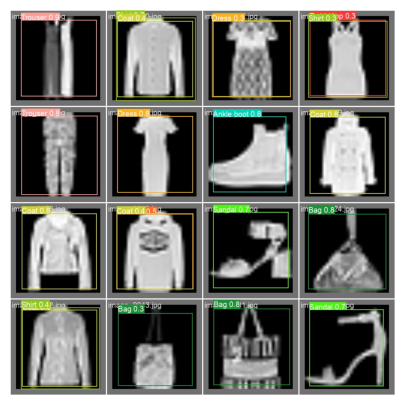

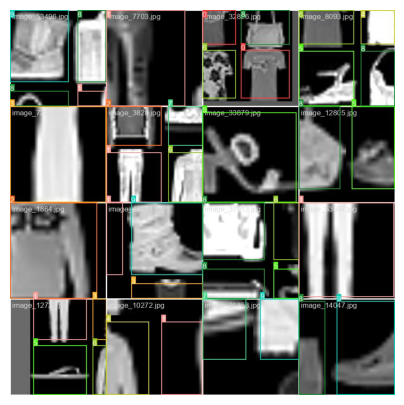

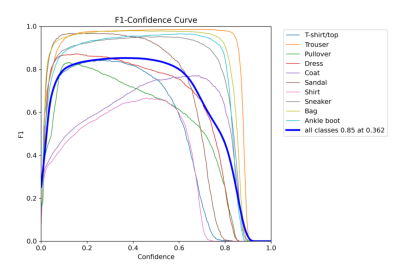

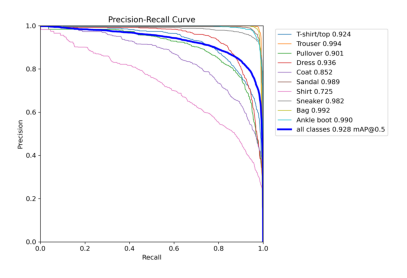

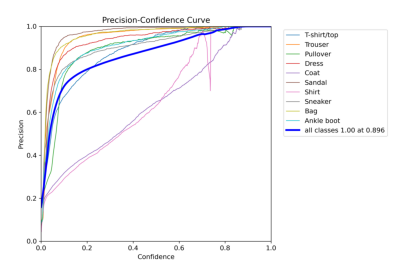

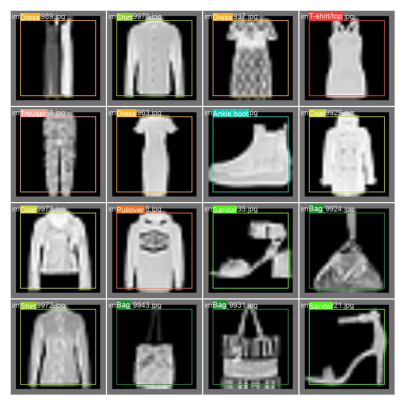

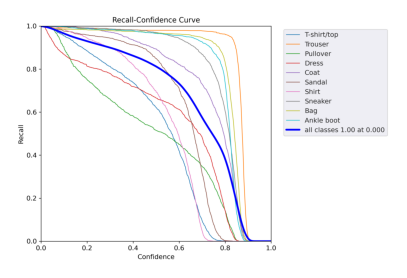

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

folder_path = "/content/yolov5/runs/train/exp3/"


if os.path.exists(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    print("Images found:", image_files)
    for image in image_files:
        img_path = os.path.join(folder_path, image)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

Epoch 1/10: 100%|██████████| 250/250 [03:09<00:00,  1.32it/s, loss=0.113]


Epoch [1/10], Loss: 0.1127


Epoch 2/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0489]


Epoch [2/10], Loss: 0.0489


Epoch 3/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0372]


Epoch [3/10], Loss: 0.0372


Epoch 4/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0273]


Epoch [4/10], Loss: 0.0273


Epoch 5/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0249]


Epoch [5/10], Loss: 0.0249


Epoch 6/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0238]


Epoch [6/10], Loss: 0.0238


Epoch 7/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0228]


Epoch [7/10], Loss: 0.0228


Epoch 8/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0224]


Epoch [8/10], Loss: 0.0224


Epoch 9/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0224]


Epoch [9/10], Loss: 0.0224


Epoch 10/10: 100%|██████████| 250/250 [03:12<00:00,  1.30it/s, loss=0.0225]


Epoch [10/10], Loss: 0.0225


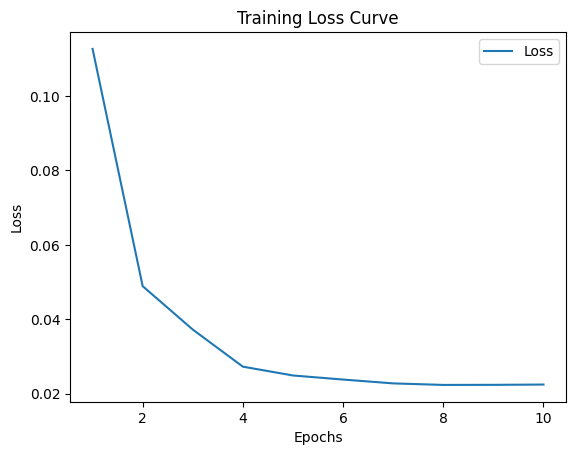

In [ ]:
import torch
import torchvision
import numpy as np
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import FashionMNIST
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

random.seed(42)
torch.manual_seed(42)

transform = T.Compose([T.ToTensor()])

train_dataset_full = FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset_full = FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_indices = []
test_indices = []
class_counts_train = [0] * 10
class_counts_test = [0] * 10

for idx, (_, label) in enumerate(train_dataset_full):
    if class_counts_train[label] < 100:
        train_indices.append(idx)
        class_counts_train[label] += 1
    if all(count == 100 for count in class_counts_train):
        break

for idx, (_, label) in enumerate(test_dataset_full):
    if class_counts_test[label] < 50:
        test_indices.append(idx)
        class_counts_test[label] += 1
    if all(count == 50 for count in class_counts_test):
        break

train_dataset = Subset(train_dataset_full, train_indices)
test_dataset = Subset(test_dataset_full, test_indices)

train_images, train_targets = [], []
test_images, test_targets = [], []

for idx in train_indices:
    img, label = train_dataset_full[idx]
    train_images.append(img)
    train_targets.append({'boxes': torch.tensor([[0, 0, 28, 28]], dtype=torch.float32),
                          'labels': torch.tensor([label], dtype=torch.int64),
                          'area': torch.tensor([28 * 28], dtype=torch.float32),
                          'iscrowd': torch.zeros((1,), dtype=torch.int64)})

for idx in test_indices:
    img, label = test_dataset_full[idx]
    test_images.append(img)
    test_targets.append({'boxes': torch.tensor([[0, 0, 28, 28]], dtype=torch.float32),
                         'labels': torch.tensor([label], dtype=torch.int64),
                         'area': torch.tensor([28 * 28], dtype=torch.float32),
                         'iscrowd': torch.zeros((1,), dtype=torch.int64)})

train_loader = DataLoader(list(zip(train_images, train_targets)), batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(list(zip(test_images, test_targets)), batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

model = models.detection.fasterrcnn_resnet50_fpn(weights=models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 10)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")

    for i, (images, targets) in progress_bar:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()
        running_loss += losses.item()
        progress_bar.set_postfix({'loss': running_loss / (i + 1)})

    loss_history.append(running_loss / len(train_loader))
    lr_scheduler.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

torch.save(model.state_dict(), "faster_rcnn_fashionmnist.pth")

plt.plot(range(1, num_epochs + 1), loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


Epoch 1/5: 100%|██████████| 250/250 [03:15<00:00,  1.28it/s, loss=0.112]


Epoch [1/5], Loss: 0.1121


Epoch 2/5: 100%|██████████| 250/250 [03:14<00:00,  1.28it/s, loss=0.0503]


Epoch [2/5], Loss: 0.0503


Epoch 3/5: 100%|██████████| 250/250 [03:15<00:00,  1.28it/s, loss=0.038]


Epoch [3/5], Loss: 0.0380


Epoch 4/5: 100%|██████████| 250/250 [03:15<00:00,  1.28it/s, loss=0.0277]


Epoch [4/5], Loss: 0.0277


Epoch 5/5: 100%|██████████| 250/250 [03:15<00:00,  1.28it/s, loss=0.0249]


Epoch [5/5], Loss: 0.0249


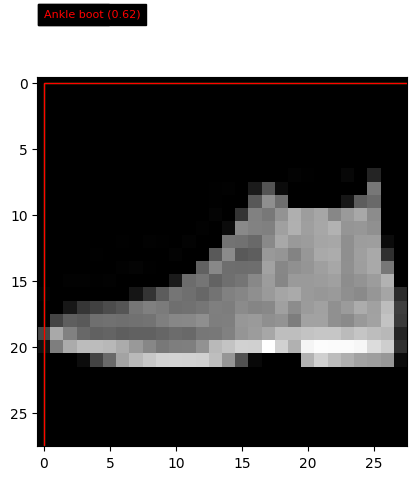

In [ ]:
import torch
import torchvision
from torchvision import models
from torchvision.models.detection import faster_rcnn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
import random

random.seed(42)
torch.manual_seed(42)

transform = T.Compose([
    T.ToTensor(),
])

full_train_dataset = FashionMNIST(root="./data", train=True, download=True, transform=transform)
full_test_dataset = FashionMNIST(root="./data", train=False, download=True, transform=transform)

def create_subset(dataset, num_samples_per_class=100):
    subset_indices = []
    class_counts = [0] * 10
    for idx, (img, label) in enumerate(dataset):
        if class_counts[label] < num_samples_per_class:
            subset_indices.append(idx)
            class_counts[label] += 1
        if all(count == num_samples_per_class for count in class_counts):
            break
    return torch.utils.data.Subset(dataset, subset_indices)

train_dataset = create_subset(full_train_dataset)
test_dataset = create_subset(full_test_dataset, num_samples_per_class=50)

class FashionMNISTDetection(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, target = self.dataset[idx]
        boxes = torch.tensor([[0, 0, 28, 28]], dtype=torch.float32)
        labels = torch.tensor([target], dtype=torch.int64)
        area = torch.tensor([28 * 28], dtype=torch.float32)
        iscrowd = torch.zeros((1,), dtype=torch.int64)
        target = {'boxes': boxes, 'labels': labels, 'area': area, 'iscrowd': iscrowd}
        return image, target

def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return torch.stack(images), targets

train_dataset = FashionMNISTDetection(train_dataset)
test_dataset = FashionMNISTDetection(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

model = models.detection.fasterrcnn_resnet50_fpn(weights=models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 10)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")

    for i, (images, targets) in progress_bar:
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()
        running_loss += losses.item()
        progress_bar.set_postfix({'loss': running_loss / (i + 1)})

    lr_scheduler.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

model.eval()
class_names = full_test_dataset.classes

def visualize_prediction(image, target, prediction, class_names):
    image = image.squeeze().cpu().numpy()


    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')

    boxes_gt = target['boxes'].cpu().numpy()
    labels_gt = target['labels'].cpu().numpy()

    for box, label in zip(boxes_gt, labels_gt):
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='green', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, class_names[label], color='green', fontsize=8, backgroundcolor='black')

    boxes_pred = prediction['boxes'].cpu().numpy()
    labels_pred = prediction['labels'].cpu().numpy()
    scores_pred = prediction['scores'].cpu().numpy()

    for box, label, score in zip(boxes_pred, labels_pred, scores_pred):
        if score > 0.5:
            x_min, y_min, x_max, y_max = box
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(x_min, y_min - 5, f"{class_names[label]} ({score:.2f})", color='red', fontsize=8, backgroundcolor='black')

    plt.show()

with torch.no_grad():
    for image, target in test_loader:
        image = list(img.to(device) for img in image)
        target = [{k: v.to(device) for k, v in t.items()} for t in target]
        prediction = model(image)[0]

        visualize_prediction(image[0], target[0], prediction, class_names)
        break

In [ ]:
import os
import torch
from torchvision.datasets import CIFAR100
from PIL import Image
from tqdm import tqdm

train_dataset = CIFAR100(root='./data', train=True, download=True)
val_dataset = CIFAR100(root='./data', train=False, download=True)

train_dir = './cifar100/train/images'
val_dir = './cifar100/val/images'
os.makedirs(os.path.join('./cifar100/train', 'labels'), exist_ok=True)
os.makedirs(os.path.join('./cifar100/val', 'labels'), exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

def create_label_file(image_name, label, img_size=32):
    """
    Create a synthetic label file for YOLOv5 format: class_id x_center y_center width height
    """
    class_id = label
    x_center = 0.5
    y_center = 0.5
    width = 1.0
    height = 1.0

    label_path = os.path.join('./cifar100/val/labels' if 'val' in image_name else './cifar100/train/labels', image_name.replace('.png', '.txt'))
    with open(label_path, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

def save_labels(dataset, directory, is_train=True):
    """
    Saves the labels for the dataset images in YOLO format.
    """
    for i, (image, label) in tqdm(enumerate(dataset), total=len(dataset)):
        image_name = f'{i}.png'
        if not is_train:
            image_name = 'val_'+ image_name
        image.save(os.path.join(directory, image_name))
        create_label_file(image_name, label, img_size=32)

save_labels(train_dataset, train_dir, is_train=True)
save_labels(val_dataset, val_dir, is_train=False)

print("Label files have been generated.")
cifar100_classes = train_dataset.classes

yaml_content = f"""
train: ./cifar100/train/images
val: ./cifar100/val/images

nc: 100
names: {cifar100_classes}
"""

yaml_file_path = './cifar100.yaml'
with open(yaml_file_path, 'w') as f:
    f.write(yaml_content)

print(f"YAML file created at: {yaml_file_path}")

!python train.py --img 416 --batch 64 --epochs 3 --data /content/yolov5/cifar100.yaml --cfg yolov5s.yaml --weights yolov5s.pt

100%|██████████| 10000/10000 [00:05<00:00, 1945.40it/s]


Label files have been generated.
YAML file created at: ./cifar100.yaml
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-19 11:44:11.772832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742384651.794289   17432 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742384651.800722   17432 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

Images found: ['val_batch1_labels.jpg', 'confusion_matrix.png', 'val_batch2_pred.jpg', 'val_batch2_labels.jpg', 'results.png', 'train_batch0.jpg', 'val_batch1_pred.jpg', 'labels.jpg', 'labels_correlogram.jpg', 'train_batch1.jpg', 'val_batch0_pred.jpg', 'train_batch2.jpg', 'F1_curve.png', 'PR_curve.png', 'P_curve.png', 'val_batch0_labels.jpg', 'R_curve.png']


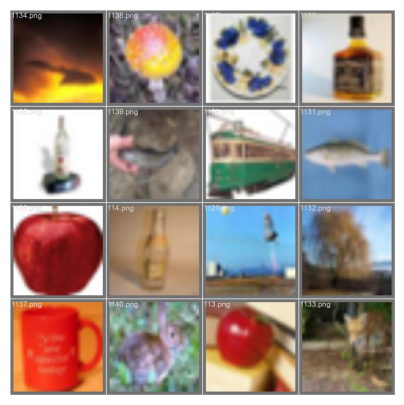

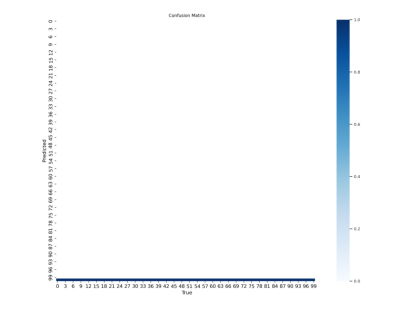

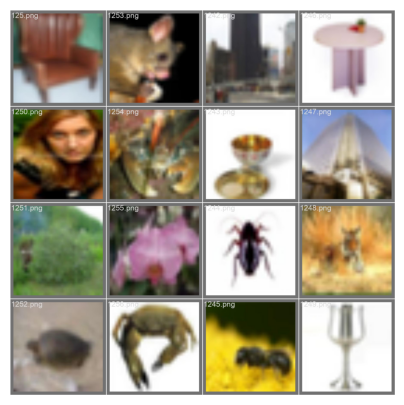

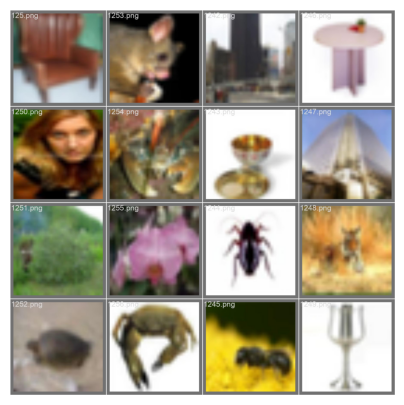

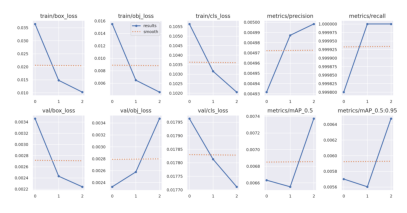

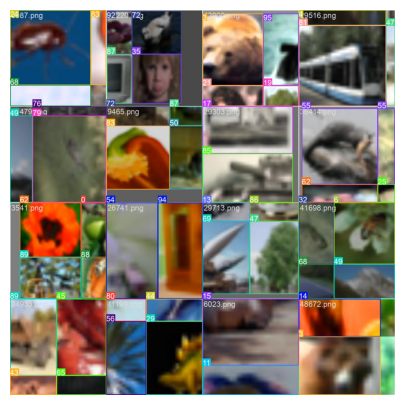

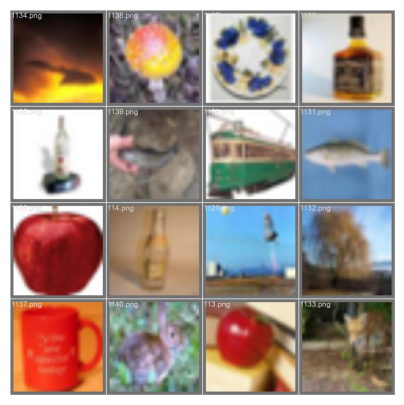

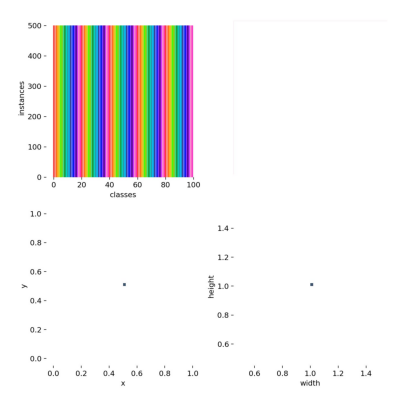

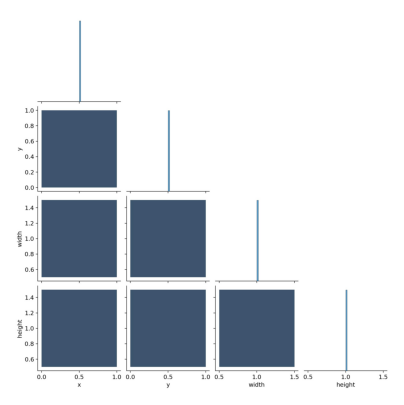

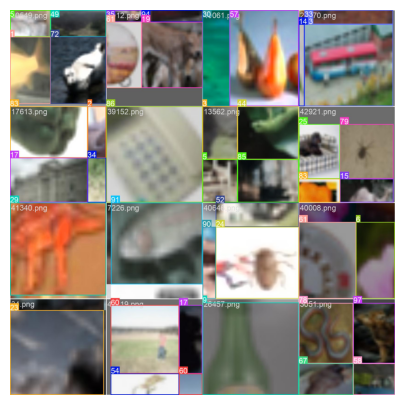

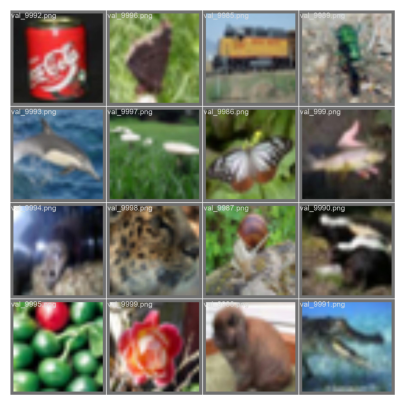

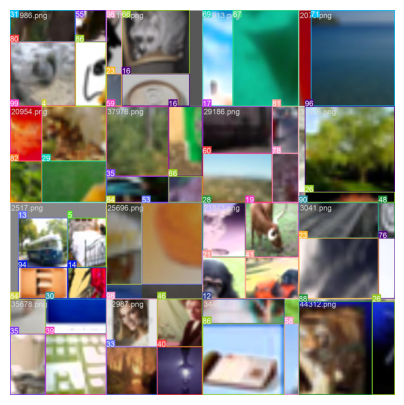

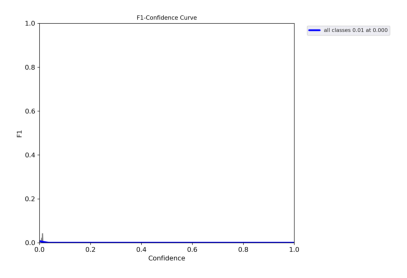

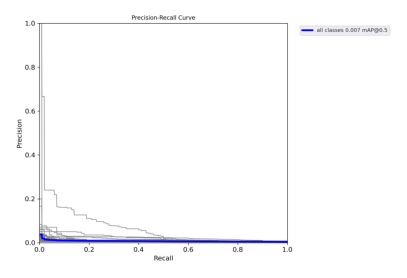

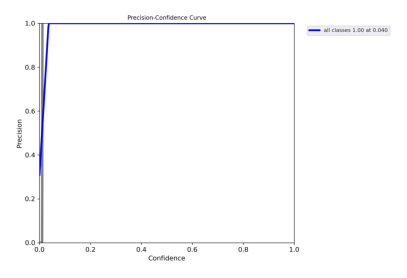

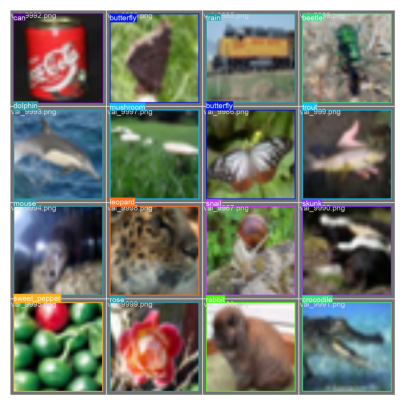

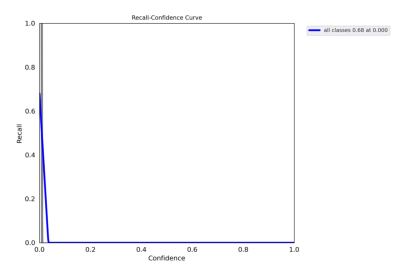

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

folder_path = '/content/yolov5/runs/train/exp8'


if os.path.exists(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    print("Images found:", image_files)
    for image in image_files:
        img_path = os.path.join(folder_path, image)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [ ]:

import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torch.utils.data import DataLoader, Subset
from tqdm import tqdm

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
train_subset = Subset(train_dataset, range(5000))
val_subset = Subset(val_dataset, range(200))
train_loader = DataLoader(train_subset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=16, shuffle=False, num_workers=2)

num_classes = 101
model = fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for images, labels in progress_bar:
        images = list(image.to(device) for image in images)
        targets = []
        for label in labels:
            target = {}
            target['boxes'] = torch.tensor([[0, 0, 32, 32]], dtype=torch.float32).to(device)
            target['labels'] = torch.tensor([label], dtype=torch.int64).to(device)
            targets.append(target)
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        total_loss += losses.item()
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        progress_bar.set_postfix({'loss': total_loss / (progress_bar.n + 1)})

torch.save(model.state_dict(), "faster_rcnn_cifar100.pth")
print("Training complete and model weights saved!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 3/3: 100%|██████████| 313/313 [14:01<00:00,  2.69s/it, loss=0.24]


Training complete and model weights saved!


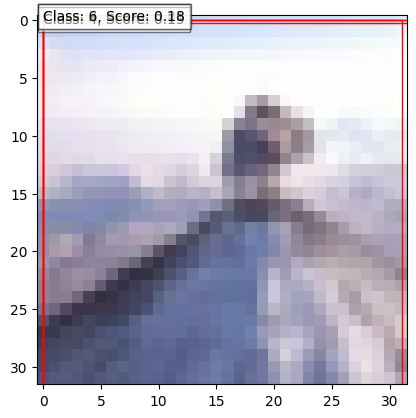

True Label: 49


In [ ]:
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches

transform = transforms.ToTensor()

image, true_label = val_dataset[0]
image_tensor = image.unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    prediction = model(image_tensor)[0]

boxes = prediction['boxes'].cpu().numpy()
labels = prediction['labels'].cpu().numpy()
scores = prediction['scores'].cpu().numpy()


plt.imshow(image.permute(1, 2, 0))
ax = plt.gca()

for i in range(len(boxes)):
    if scores[i] > 0.1:
        x1, y1, x2, y2 = boxes[i]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1, f'Class: {labels[i]}, Score: {scores[i]:.2f}', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

print(f"True Label: {true_label}")